# Week 2 and 3: End-to-end Supervised Learning Project (Regression)

# Week 2: Data Exploration and Visualization

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥ 1.0

In [36]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, )

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

"""
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
"""

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 1. Get the Data

First of all let's import the data from the CSV file.

In [37]:
filepath = os.path.abspath(os.path.join('..', 'datasets', 'kings_county_house_data.csv'))
print('File path: {}'.format(filepath))
housing = pd.read_csv(filepath, dtype={'zipcode': str})

File path: /Users/nick/Documents/GitHub/Python-Programming-for-Data-Science-Part-2/datasets/kings_county_house_data.csv


We can get an overall idea of the fields available using the `DataFrame.info()` and `DataFrame.describe()` methods.

In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

In [39]:
housing.sample(10)

id             date       price  bedrooms  bathrooms  \
3744   7974700112  20140714T000000  650000.000         4      2.500   
2151   2124069078  20141211T000000  525000.000         2      1.500   
6282   8071000050  20141113T000000  270000.000         2      1.000   
14639  8835900220  20140828T000000 1442500.000         2      2.500   
3437   3423049311  20141017T000000  216000.000         3      2.000   
13345  1370801565  20141030T000000 1100000.000         4      2.500   
744    3300701170  20140620T000000  395000.000         3      1.000   
17126  5379806590  20150430T000000  280000.000         3      1.500   
9464   5647900120  20140613T000000  250600.000         4      2.500   
1432   2861100030  20141007T000000  265000.000         2      1.000   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
3744          2530      6500   1.500           0     0  ...      8   
2151          1480     43645   1.000           0     0  ...      8   
6282          1040      5700   1.000           0     0  ...      6   
14639         2720     16637   1.000           0     3  ...     10   
3437          1260      4125   1.000           0     0  ...      6   
13345         2910      8881   2.000           0     1  ...     10   
744           1500      4000   1.000           0     0  ...      6   
17126         1430      8861   1.000           0     0  ...      7   
9464          1930      8660   1.000           0     0  ...      7   
1432           760      4000   1.000           0     0  ...      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode    lat  \
3744         1720            810      1975             0    98115 47.674   
2151         1480              0      1974          2006    98027 47.548   
6282         1040              0      1922             0    98118 47.519   
14639        2160            560      1953             0    98118 47.550   
3437         1260              0      1998             0    98188 47.440   
13345        1940            970      1932             0    98199 47.642   
744           900            600      1925             0    98117 47.692   
17126        1430              0      1956             0    98188 47.445   
9464         1120            810      1981             0    98001 47.326   
1432          760              0      1950             0    98108 47.547   

          long  sqft_living15  sqft_lot15  
3744  -122.284           2150        5280  
2151  -122.045           1600       34326  
6282  -122.260           1380        5700  
14639 -122.264           2880        7320  
3437  -122.279           1300        9091  
13345 -122.411           2540        5250  
744   -122.380            950        4000  
17126 -122.289           1080        9425  
9464  -122.260           1830        9591  
1432  -122.304           1640        4500  

[10 rows x 21 columns]

In [40]:
housing.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21613.000   21613.000 21613.000  21613.000    21613.000   
mean  4580301520.865  540088.142     3.371      2.115     2079.900   
std   2876565571.312  367127.196     0.930      0.770      918.441   
min      1000102.000   75000.000     0.000      0.000      290.000   
25%   2123049194.000  321950.000     3.000      1.750     1427.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900445.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21613.000 21613.000   21613.000 21613.000  21613.000 21613.000   
mean    15106.968     1.494       0.008     0.234      3.409     7.657   
std     41420.512     0.540       0.087     0.766      0.651     1.175   
min       520.000     1.000       0.000     0.000      1.000     1.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10688.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  sqft_basement  yr_built  yr_renovated       lat      long  \
count   21613.000      21613.000 21613.000     21613.000 21613.000 21613.000   
mean     1788.391        291.509  1971.005        84.402    47.560  -122.214   
std       828.091        442.575    29.373       401.679     0.139     0.141   
min       290.000          0.000  1900.000         0.000    47.156  -122.519   
25%      1190.000          0.000  1951.000         0.000    47.471  -122.328   
50%      1560.000          0.000  1975.000         0.000    47.572  -122.230   
75%      2210.000        560.000  1997.000         0.000    47.678  -122.125   
max      9410.000       4820.000  2015.000      2015.000    47.778  -121.315   

       sqft_living15  sqft_lot15  
count      21613.000   21613.000  
mean        1986.552   12768.456  
std          685.391   27304.180  
min          399.000     651.000  
25%         1490.000    5100.000  
50%         1840.000    7620.000  
75%         2360.000   10083.000  
max         6210.000  871200.000

## 2. Create a Training and Test Set

Creating a test set is theoretically simple: pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside. We will use a function from `scikit-learn` which splits a dataset into training and test set.

In [41]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [42]:
train_set.shape, test_set.shape

((17290, 21), (4323, 21))

In this way we would just be doing a simple randomized sampling. But this might not be a representative sampling of the whole dataset, if we do not preserve the proportions (or percentages) of significant input features. Let's hypothesize that we learned from expert the `sqft_living` field is an important predictor for the house price. 

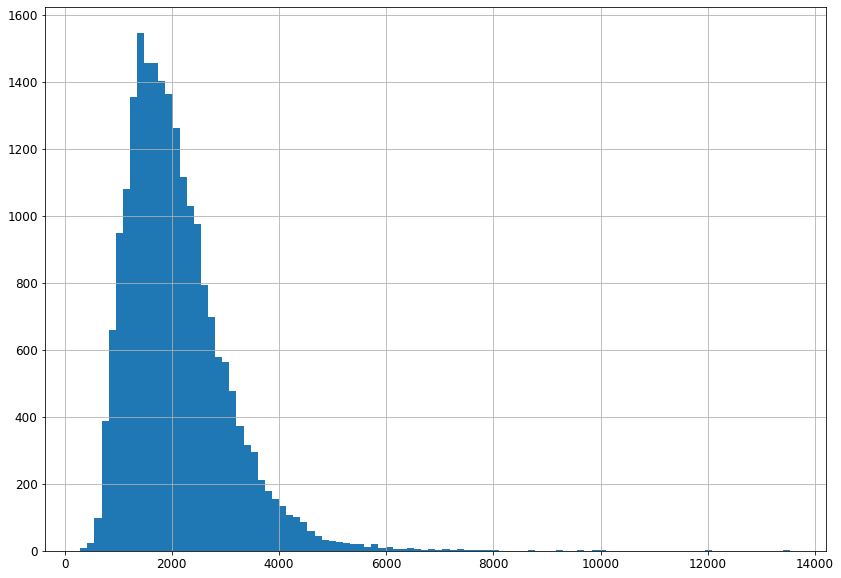

In [43]:
housing.sqft_living.hist(bins=100, figsize=(14,10))
plt.show()

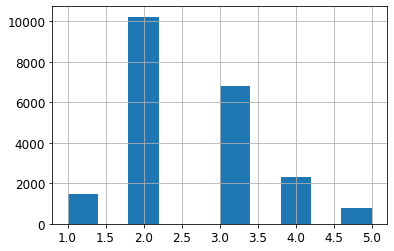

In [44]:
housing["sqft_living_cat"] = pd.cut(housing.sqft_living, 
                                    bins=[0., 1000., 2000., 3000., 4000., np.inf],
                                    labels=[1, 2, 3, 4, 5]
                                   )
housing['sqft_living_cat'].hist()
plt.show()

In [45]:
housing['sqft_living_cat'].value_counts() / len(housing)

2   0.473
3   0.316
4   0.106
1   0.069
5   0.036
Name: sqft_living_cat, dtype: float64

In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               21613 non-null  int64   
 1   date             21613 non-null  object  
 2   price            21613 non-null  float64 
 3   bedrooms         21613 non-null  int64   
 4   bathrooms        21613 non-null  float64 
 5   sqft_living      21613 non-null  int64   
 6   sqft_lot         21613 non-null  int64   
 7   floors           21613 non-null  float64 
 8   waterfront       21613 non-null  int64   
 9   view             21613 non-null  int64   
 10  condition        21613 non-null  int64   
 11  grade            21613 non-null  int64   
 12  sqft_above       21613 non-null  int64   
 13  sqft_basement    21613 non-null  int64   
 14  yr_built         21613 non-null  int64   
 15  yr_renovated     21613 non-null  int64   
 16  zipcode          21613 non-null  object 

In [47]:
housing.sample(15)

id             date      price  bedrooms  bathrooms  \
3109   2641800015  20141124T000000 158800.000         3      1.000   
9309   1023089019  20140730T000000 452000.000         5      1.750   
19679  5214510060  20150504T000000 575000.000         5      2.500   
13198  2594200230  20150424T000000 680000.000         2      1.000   
354    9262800171  20150324T000000 252000.000         4      1.500   
9985   8722100030  20150407T000000 632750.000         4      2.000   
15761  8638500020  20140911T000000 315000.000         3      1.000   
4506   9407111220  20150504T000000 303000.000         2      1.000   
2855   9828702812  20140923T000000 582000.000         4      3.000   
12417   123039336  20140611T000000 148000.000         1      1.000   
21384  6372000297  20150323T000000 608000.000         3      3.500   
20670  8564860270  20150330T000000 502000.000         4      2.500   
4424    826069002  20141029T000000 355000.000         2      1.000   
11447  5152980070  20150102T000000 514500.000         4      2.500   
6547   8121200460  20141119T000000 530000.000         3      2.500   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
3109           960      8291   1.000           0     0  ...         960   
9309          1830     47916   1.500           0     0  ...        1830   
19679         3070      7200   2.000           0     0  ...        3070   
13198         1020      8442   1.000           0     4  ...         920   
354           1550     19800   1.000           0     0  ...        1050   
9985          1800      4800   1.500           0     0  ...        1800   
15761         1210      8505   1.500           0     0  ...        1210   
4506          1020      9200   1.000           0     0  ...        1020   
2855          1670      1189   3.000           0     0  ...        1427   
12417          620      8261   1.000           0     0  ...         620   
21384         1660      2298   2.000           0     0  ...        1260   
20670         2680      5539   2.000           0     0  ...        2680   
4424          1350    368517   1.000           0     0  ...        1350   
11447         2990      9614   1.000           0     2  ...        1740   
6547          2030     10958   2.000           0     0  ...        2030   

       sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
3109               0      1950             0    98146 47.501 -122.334   
9309               0      1948             0    98045 47.488 -121.777   
19679              0      2005             0    98059 47.494 -122.137   
13198            100      1941             0    98136 47.514 -122.391   
354              500      1969             0    98001 47.312 -122.270   
9985               0      1918             0    98112 47.639 -122.302   
15761              0      1958             0    98106 47.539 -122.353   
4506               0      1978             0    98045 47.446 -121.769   
2855             243      2000             0    98122 47.618 -122.302   
12417              0      1939             0    98106 47.514 -122.364   
21384            400      2009             0    98116 47.581 -122.403   
20670              0      2013             0    98045 47.476 -121.734   
4424               0      1947             0    98077 47.762 -122.061   
11447           1250      1976             0    98003 47.342 -122.329   
6547               0      1983             0    98052 47.725 -122.110   

       sqft_living15  sqft_lot15  sqft_living_cat  
3109            1110        8231                1  
9309            2010       13135                2  
19679           2590        7200                4  
13198           2550       10323                2  
354             1640       22654                2  
9985            1950        4800                2  
15761           1430        8505                2  
4506            1520        9600                2  
2855            1700        1401                2  
1241

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(housing, housing.sqft_living_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [49]:
strat_train_set.shape, strat_test_set.shape

((17290, 22), (4323, 22))

In [50]:
strat_train_set.sqft_living_cat.value_counts() / len(strat_train_set)

2   0.473
3   0.316
4   0.106
1   0.069
5   0.036
Name: sqft_living_cat, dtype: float64

In [51]:
strat_test_set.sqft_living_cat.value_counts() / len(strat_test_set)

2   0.473
3   0.316
4   0.106
1   0.069
5   0.036
Name: sqft_living_cat, dtype: float64

In [52]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("sqft_living_cat", axis=1, inplace=True)

## 3. Discover and Visualize the Data to Gain Insights

### 3.1 Outlier Detection (optional)

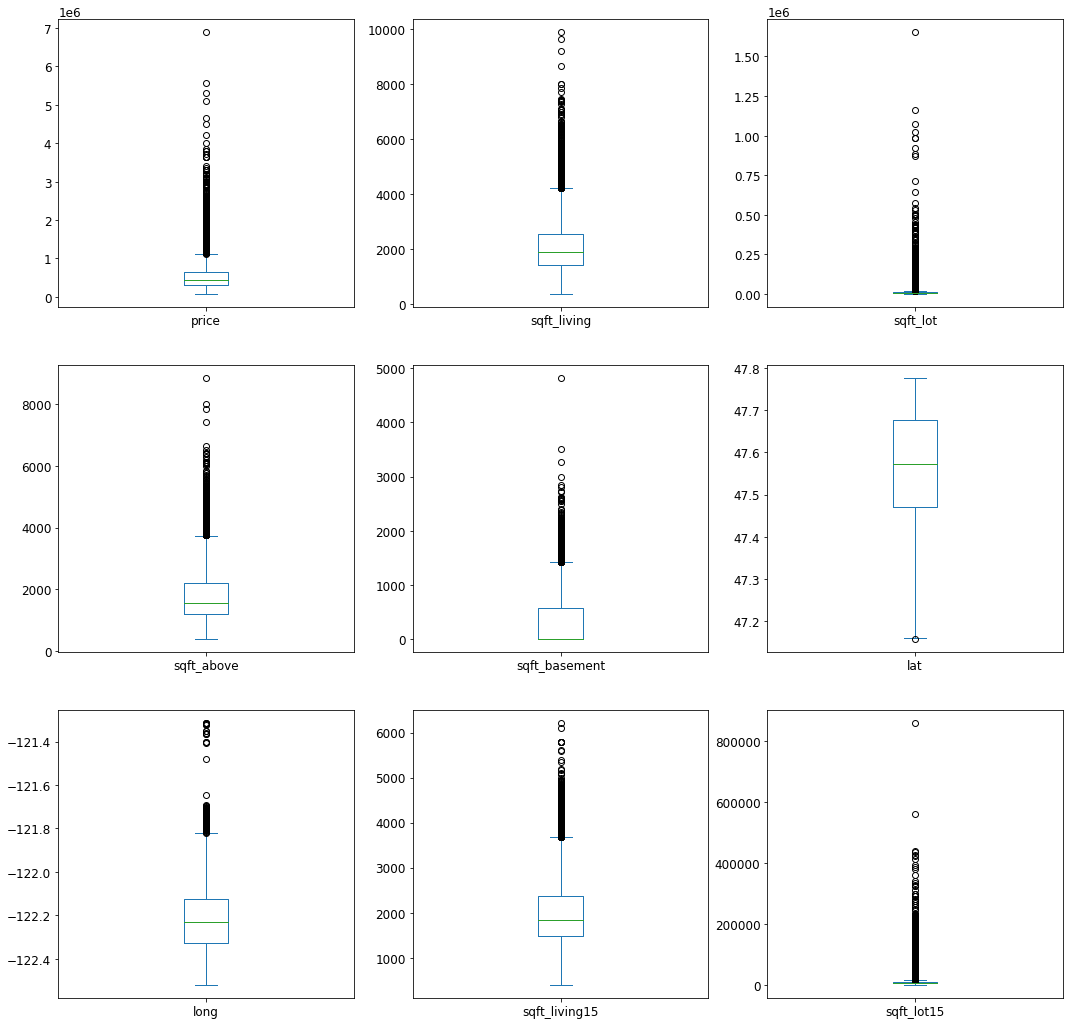

In [53]:
p = strat_train_set[
    ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
     'lat', 'long', 'sqft_living15', 'sqft_lot15']
].plot.box(subplots=True, layout=(3, 3), figsize=(18,18))

<AxesSubplot:>

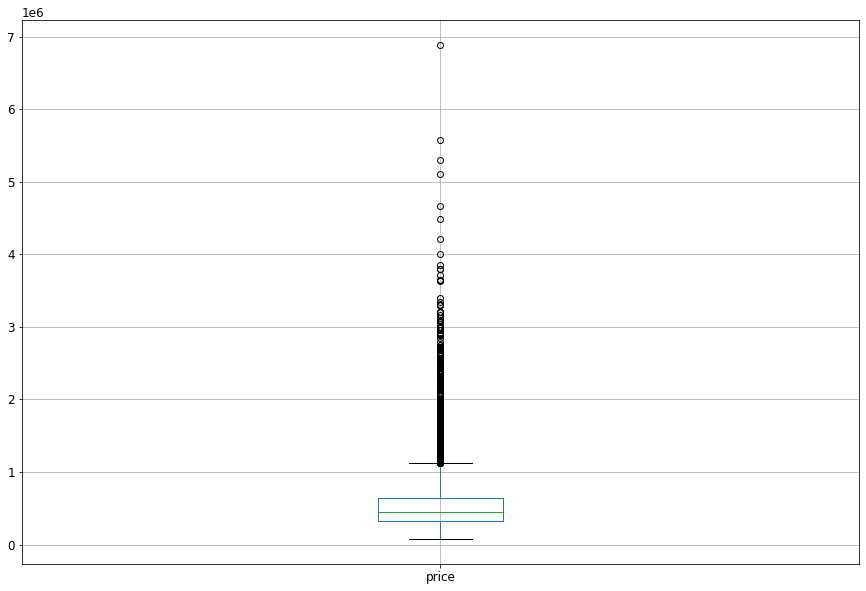

In [54]:
strat_train_set[['price']].boxplot(figsize=(15,10))

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

Wikipedia Definition:
_The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, $IQR = Q_3 − Q_1$.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers._

If a data point is below $Q_1 - 1.5\times IQR$ or above $Q_3 + 1.5\times IQR$ then it's an outlier.

<b>Exercise 1:</b> Compute for me the count of outliers in our training set with respect to the `price` feature. (Hint: check the `DataFrame.quantile()` method and find a way to count the occurrences of values in a column of a DataFrame.) Additionally, write the code to remove those outliers. 

In [55]:
## Write you solution here. Add as many cells as you see fit
strat_train_set.quantile(0.25)

id              2124054210.000
price               321500.000
bedrooms                 3.000
bathrooms                1.750
sqft_living           1430.000
sqft_lot              5040.000
floors                   1.000
waterfront               0.000
view                     0.000
condition                3.000
grade                    7.000
sqft_above            1190.000
sqft_basement            0.000
yr_built              1951.000
yr_renovated             0.000
lat                     47.470
long                  -122.329
sqft_living15         1480.000
sqft_lot15            5100.000
Name: 0.25, dtype: float64

In [56]:
## Write you solution here. Add as many cells as you see fit
strat_train_set.quantile(0.75)

id              7312400078.750
price               643837.500
bedrooms                 4.000
bathrooms                2.500
sqft_living           2550.000
sqft_lot             10697.750
floors                   2.000
waterfront               0.000
view                     0.000
condition                4.000
grade                    8.000
sqft_above            2210.000
sqft_basement          570.000
yr_built              1997.000
yr_renovated             0.000
lat                     47.678
long                  -122.125
sqft_living15         2360.000
sqft_lot15           10118.000
Name: 0.75, dtype: float64

In [57]:
iqr = strat_train_set.quantile(0.75) - strat_train_set.quantile(0.25)
iqr

id              5188345868.750
price               322337.500
bedrooms                 1.000
bathrooms                0.750
sqft_living           1120.000
sqft_lot              5657.750
floors                   1.000
waterfront               0.000
view                     0.000
condition                1.000
grade                    1.000
sqft_above            1020.000
sqft_basement          570.000
yr_built                46.000
yr_renovated             0.000
lat                      0.208
long                     0.204
sqft_living15          880.000
sqft_lot15            5018.000
dtype: float64

In [58]:
strat_train_set.quantile(0.5)

id              3904990345.000
price               450000.000
bedrooms                 3.000
bathrooms                2.250
sqft_living           1910.000
sqft_lot              7610.000
floors                   1.500
waterfront               0.000
view                     0.000
condition                3.000
grade                    7.000
sqft_above            1560.000
sqft_basement            0.000
yr_built              1975.000
yr_renovated             0.000
lat                     47.571
long                  -122.231
sqft_living15         1840.000
sqft_lot15            7620.000
Name: 0.5, dtype: float64

In [59]:
strat_train_set.quantile(0.5)['price']

450000.0

In [60]:
strat_train_set.quantile(0.25)['price']

321500.0

In [61]:
q1 = strat_train_set.quantile(0.25)
q3 = strat_train_set.quantile(0.75)
iqr = q3 - q1
iqr

id              5188345868.750
price               322337.500
bedrooms                 1.000
bathrooms                0.750
sqft_living           1120.000
sqft_lot              5657.750
floors                   1.000
waterfront               0.000
view                     0.000
condition                1.000
grade                    1.000
sqft_above            1020.000
sqft_basement          570.000
yr_built                46.000
yr_renovated             0.000
lat                      0.208
long                     0.204
sqft_living15          880.000
sqft_lot15            5018.000
dtype: float64

Are the outliers legitimate or should we remove them?

If a data point is below $Q_1 - 1.5\times IQR$ or above $Q_3 + 1.5\times IQR$ then it's an outlier.

In [62]:
q1.price - (1.5 * iqr.price)

-162006.25

In [63]:
q3.price + (1.5 * iqr.price)

1127343.75

In [64]:
outlier_crit_q1_price = strat_train_set.price < (q1.price - 1.5 * iqr.price)
outlier_crit_q3_price = strat_train_set.price > (q3.price + 1.5 * iqr.price)

outlier_crit = outlier_crit_q1_price | outlier_crit_q3_price
outlier_crit.value_counts()

False    16367
True       923
Name: price, dtype: int64

In [65]:
outlier_crit

20474    False
3840     False
7426      True
4038     False
11420    False
         ...  
14469    False
8505     False
549      False
4482     False
1941     False
Name: price, Length: 17290, dtype: bool

In [66]:
strat_train_set.price

20474    379000.000
3840     173000.000
7426    1393000.000
4038     390000.000
11420    440500.000
            ...    
14469    595000.000
8505     225000.000
549      215000.000
4482     474000.000
1941     998000.000
Name: price, Length: 17290, dtype: float64

In [67]:
outlier_crit_q1_price

20474    False
3840     False
7426     False
4038     False
11420    False
         ...  
14469    False
8505     False
549      False
4482     False
1941     False
Name: price, Length: 17290, dtype: bool

In [68]:
outlier_crit_q3_price

20474    False
3840     False
7426      True
4038     False
11420    False
         ...  
14469    False
8505     False
549      False
4482     False
1941     False
Name: price, Length: 17290, dtype: bool

In [69]:
q1.price - (1.5 * iqr.price)

-162006.25

In [70]:
q3 + (1.5 * iqr)

id              15094918881.875
price               1127343.750
bedrooms                  5.500
bathrooms                 3.625
sqft_living            4230.000
sqft_lot              19184.375
floors                    3.500
waterfront                0.000
view                      0.000
condition                 5.500
grade                     9.500
sqft_above             3740.000
sqft_basement          1425.000
yr_built               2066.000
yr_renovated              0.000
lat                      47.989
long                   -121.819
sqft_living15          3680.000
sqft_lot15            17645.000
dtype: float64

### 3.2 Visualize geographical data

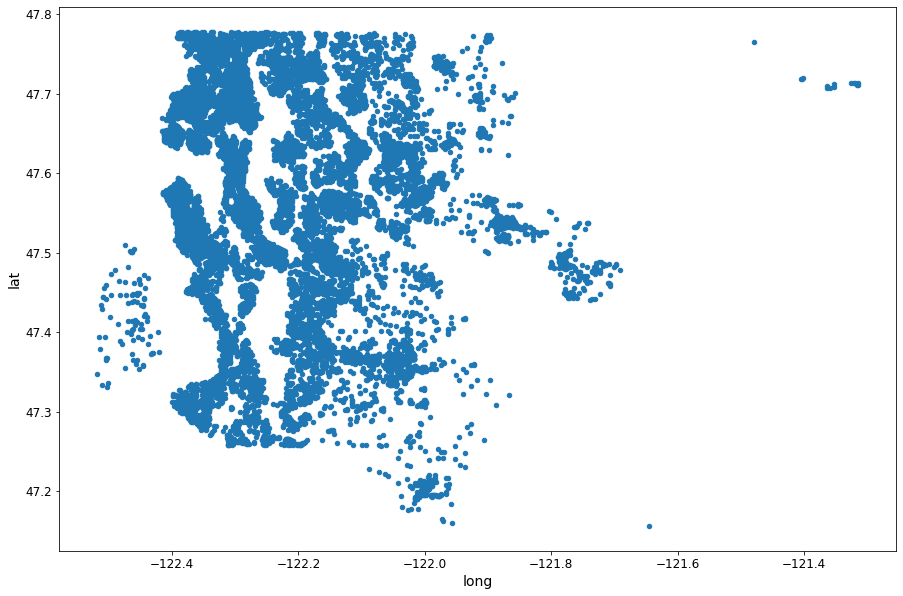

In [71]:
strat_train_set.plot(
    kind="scatter", x="long", y="lat", figsize=(15,10)
)
plt.show()

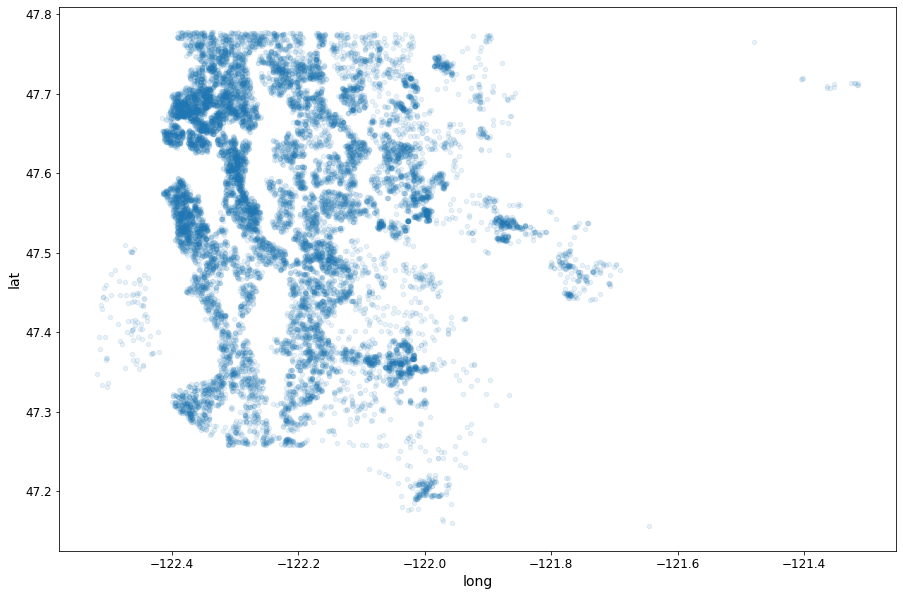

In [72]:
strat_train_set.plot(kind="scatter", x="long", y="lat", alpha=0.1, figsize=(15,10))
plt.show()

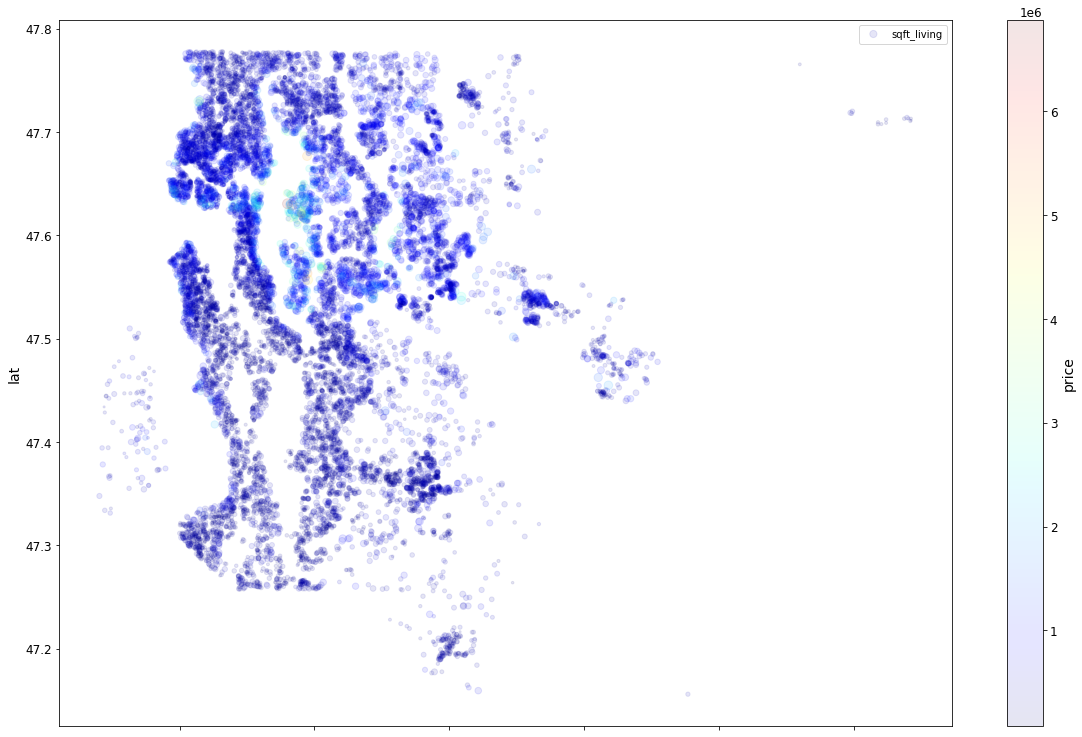

In [73]:
strat_train_set.plot(
    kind="scatter", x="long", y="lat", alpha=0.1, figsize=(20,13),
    s=strat_train_set["sqft_living"]/100, label="sqft_living",
    c="price", cmap=plt.get_cmap('jet'), colorbar=True
)
plt.legend()
plt.show()

Using the same colormap (i.e. jet), we can try to improve the visualization above, setting an upper value that is reasonable, (i.e less or equal to QR3 + 1.5 IQR such as 1,000,000 $), and not the highest value in the range.

We can create a custom discrete colorbar by using `matplotlib.colors.BoundaryNorm` as normalizer for your scatterplot. See the norm argument in `matplotlib.pyplot.scatter()`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html


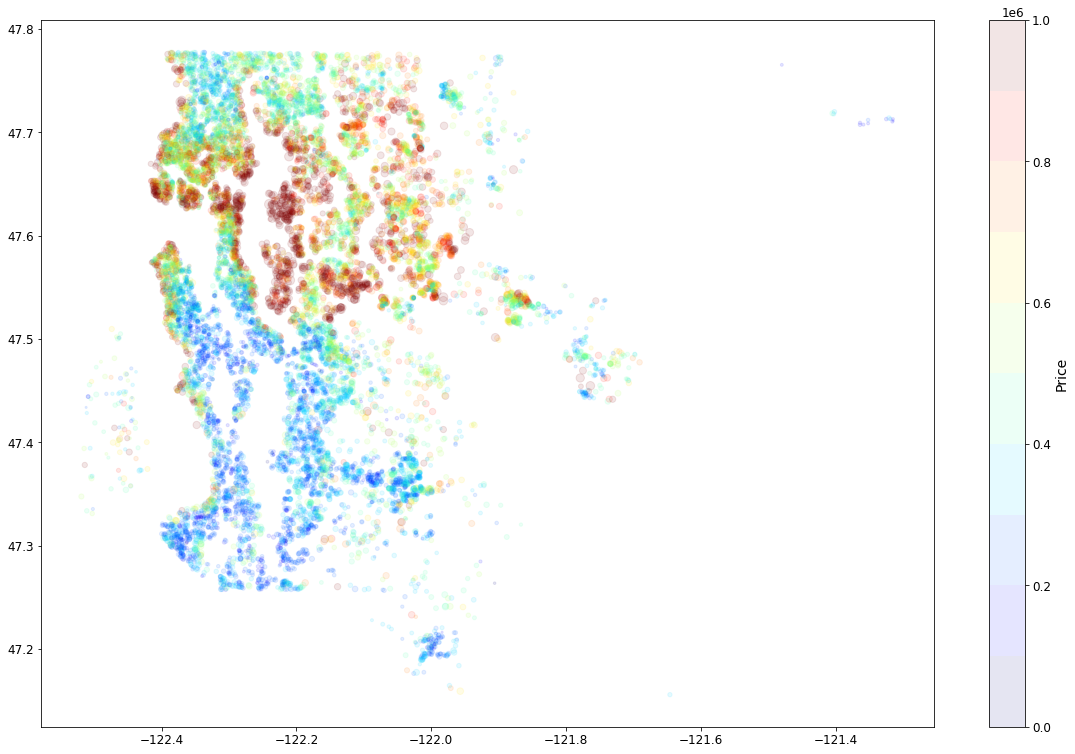

In [74]:
cmap = plt.cm.jet  # define the colormap
bounds = np.linspace(0, 1e6, 11) # define 11 evenly space

# The matplotlib.colors.BoundaryNorm class is used to create a colormap based on discrete numeric intervals.
norm = mpl.colors.BoundaryNorm(
    bounds, # Monotonically increasing sequence of boundaries
    cmap.N # Number of colors in the colormap to be used
)

plt.figure(figsize=(20, 13))
plt.scatter(
    x=strat_train_set["long"],
    y=strat_train_set["lat"],
    alpha=0.1,
    s=strat_train_set["sqft_living"]/100, # size of the dot
    label=strat_train_set["sqft_living"],
    c=strat_train_set["price"], # colour of the dot
    cmap=cmap, # colour map 
    norm=norm # used to scale the color data, c, in the range 0 to 1, in order to map into the colormap cmap
)
plt.colorbar(label="Price", orientation="vertical")
plt.show()

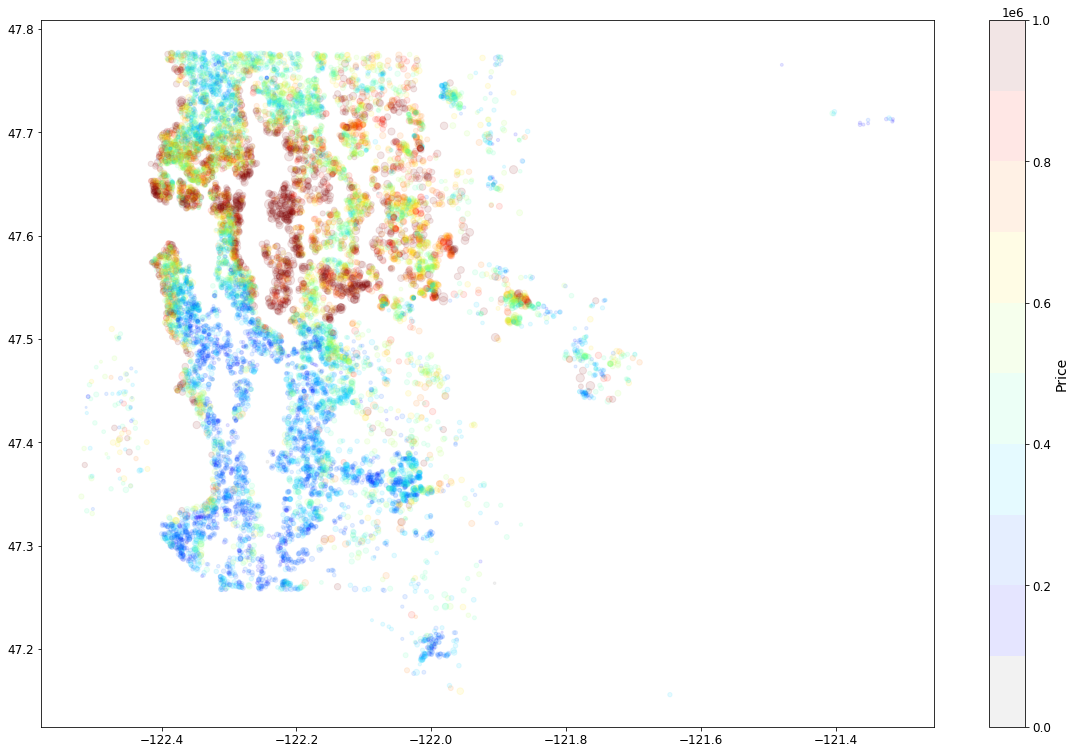

In [75]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N
)

# define the bins and normalize
bounds = np.linspace(0, 1e6, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(20, 13))
plt.scatter(
    x=strat_train_set["long"], y=strat_train_set["lat"],
    alpha=0.1,
    s=strat_train_set["sqft_living"]/100, label=strat_train_set["sqft_living"],
    c=strat_train_set["price"], cmap=cmap, norm=norm
)
plt.colorbar(label="Price", orientation="vertical")
plt.show()

<b>Exercise 2:</b> explore on your own other ways to improve the graph above. You could look for ways to overlap it on top of the county map, or you could see if you can encode information differently

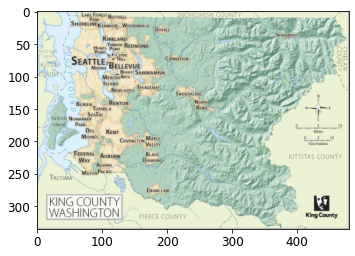

In [76]:
### Write your solution here

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

mapjpg = os.path.abspath(os.path.join('..', 'nd tests', 'KC_simplemap_Oct2013.jpg'))

img = mpimg.imread(mapjpg)
#print(img)

imgplot = plt.imshow(img)


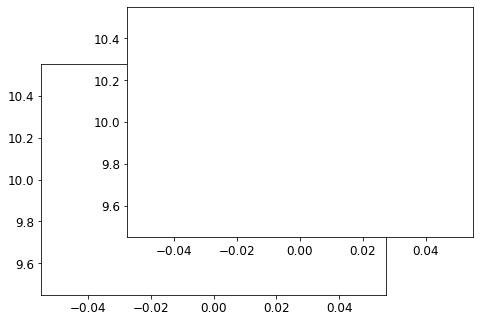

In [77]:
fig = plt.figure() #like a blank canvas

# percentages of screen
axes1 = fig.add_axes([0.2,0.2,0.8,0.8])

axes2 = fig.add_axes([0.4,0.4,0.8,0.8])

axes1.plot(0, 10)
axes2.plot(0, 10)

#axes1.plot(x,y)
#axes2.plot(y,x)

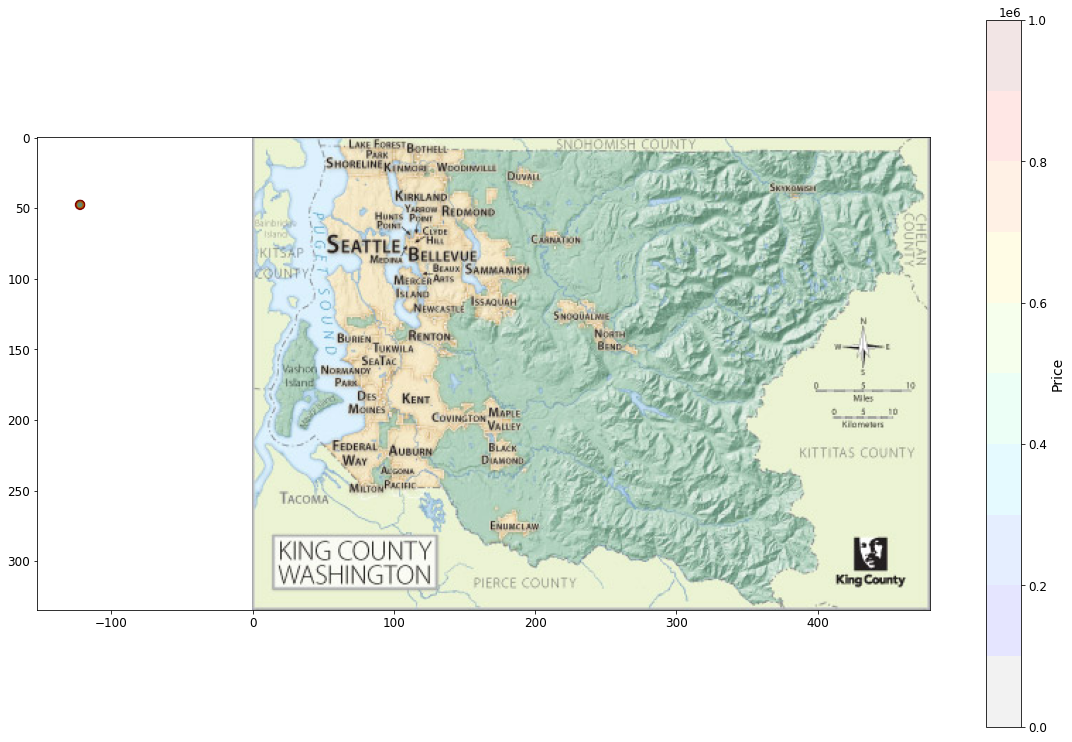

In [78]:

plt.figure(figsize=(20, 13))

axes1 = plt.imshow(img)

axes2 = plt.scatter(
    x=strat_train_set["long"], y=strat_train_set["lat"],
    alpha=0.1,
    s=strat_train_set["sqft_living"]/100, label=strat_train_set["sqft_living"],
    c=strat_train_set["price"], cmap=cmap, norm=norm
)
plt.colorbar(label="Price", orientation="vertical")

plt.show()


In [79]:
strat_train_set['lat'] -= 47

In [80]:
strat_train_set['long'] -= 125

In [81]:
strat_train_set['lat'] *= 300
strat_train_set['long'] *= 300

In [82]:
strat_train_set['long'] += 800

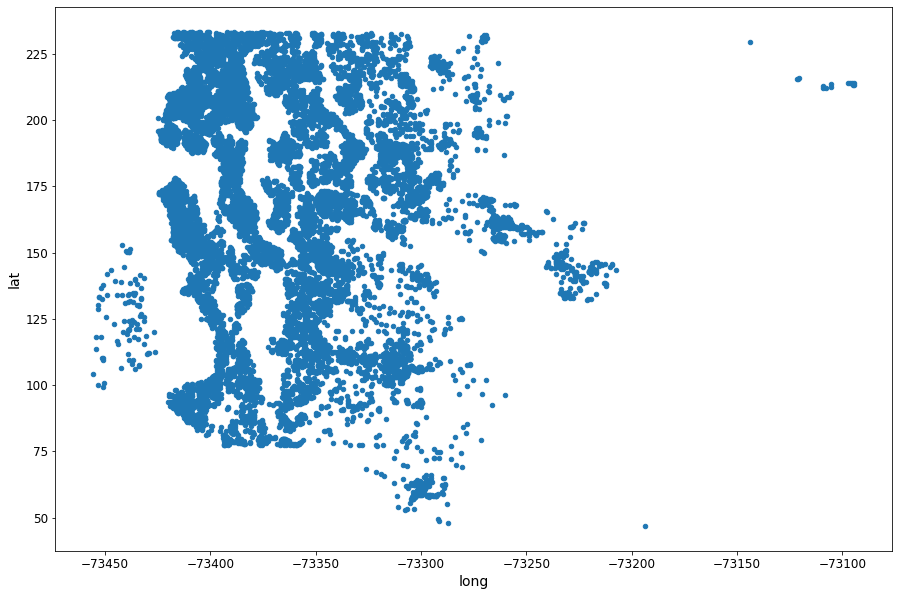

In [83]:
strat_train_set.plot(
    kind="scatter", x="long", y="lat", figsize=(15,10)
)

strat_train_set

plt.show()

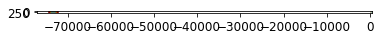

In [84]:
axes1 = plt.imshow(img)

axes2 = plt.scatter(
    x=strat_train_set["long"], y=strat_train_set["lat"],
    alpha=0.1,
    s=strat_train_set["sqft_living"]/100, label=strat_train_set["sqft_living"],
    c=strat_train_set["price"], cmap=cmap, norm=norm
)


# GeoPy 

https://geopy.readthedocs.io/en/stable/ 

Need to install in a terminal: 

`pip install geopy`

In [85]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="name")
#location = geolocator.geocode("175 5th Avenue NYC")
location = geolocator.geocode("King County WC")

print(location.address)

print((location.latitude, location.longitude))

print(location.raw)


WC Hall Realty, 1st Avenue South, Five Corners, Burien, King County, Washington, 98166, United States
(47.4628028, -122.333536)
{'place_id': 62637180, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 5658984377, 'boundingbox': ['47.4627528', '47.4628528', '-122.333586', '-122.333486'], 'lat': '47.4628028', 'lon': '-122.333536', 'display_name': 'WC Hall Realty, 1st Avenue South, Five Corners, Burien, King County, Washington, 98166, United States', 'class': 'office', 'type': 'estate_agent', 'importance': 0.30010000000000003}


# Then use a map service like Google or OpenStreetMap

![map](https://geopy.readthedocs.io/en/stable/_static/geopy_and_geocoding_services.svg)

### 3.2 Looking for correlations

The dataset is not that big, and we can compute the standard correlation coefficient (Pearson’s r coefficient) between every two features using the `DataFrame.corr()` method:

In [86]:
corr_matrix = strat_train_set.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000
sqft_living      0.702
grade            0.674
sqft_above       0.605
sqft_living15    0.589
bathrooms        0.524
view             0.391
sqft_basement    0.320
bedrooms         0.308
lat              0.308
waterfront       0.260
floors           0.260
yr_renovated     0.114
sqft_lot         0.091
sqft_lot15       0.089
yr_built         0.060
condition        0.037
long             0.025
id              -0.012
Name: price, dtype: float64

N.B. The correlation coefficient only measures linear correlations, and it may completely miss nonlinear correlation factors. 

Another way to check for correlation visually is to use the `scatter_matrix()` utility function offered by Pandas, which leverages `matplotlib`, or seaborn's `pairplot()` function.

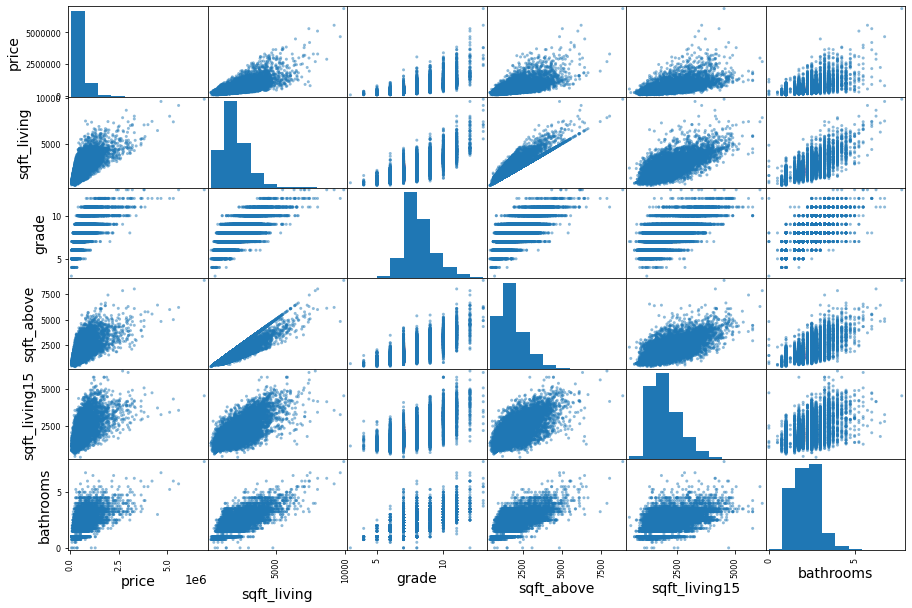

In [87]:
attributes = ["price", "sqft_living", "grade",
              "sqft_above", "sqft_living15", "bathrooms"]
pd.plotting.scatter_matrix(
    strat_train_set[attributes], figsize=(15, 10)
)
plt.show()

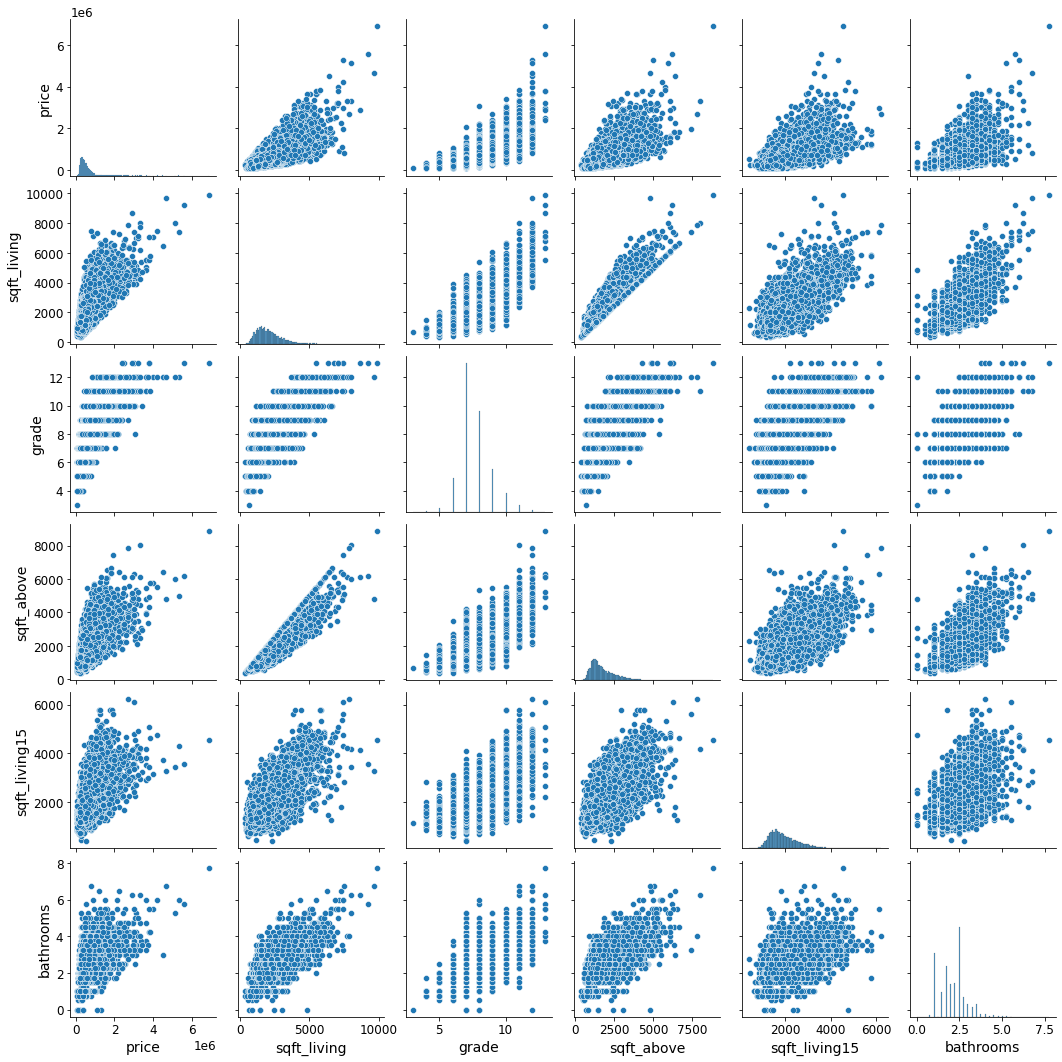

In [88]:
import seaborn as sns
ax = sns.pairplot(strat_train_set[attributes])

We can then start using boxplots or violinplots to further investigate targeted correlations, such as 'grade' vs 'price' or 'floors' vs 'price'.

<b>Exercise 3:</b> write a function that takes a categorical or ordinal feature as a first argument, the size of a figure as a second argument and plots, using seaborn, a set of boxplots of the price distribution for each category in the input categorical feature.

In [89]:
## Write you solution here.
# Populate the function body. I've written the function interface (i.e. its API) for you
def print_boxplot(feature, figsize=(14, 6)):
    
    data = pd.concat(
        [strat_train_set['price'], strat_train_set[feature]],
        axis=1
    )
    plt.subplots(figsize=figsize)
    fig = sns.boxplot(x=feature, y="price", data=data)
    fig.axis(ymin=0, ymax=5000000);
    

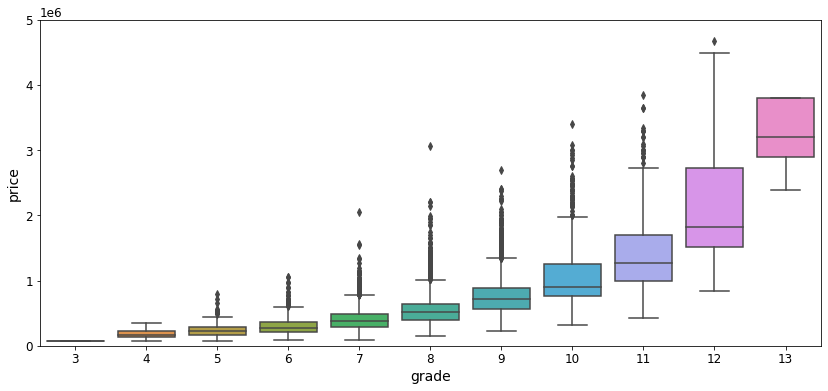

In [90]:
## Try your function to plot 'grade' vs 'price'.
## If you have implemented it correctly it will plot out the boxplots
print_boxplot('grade')

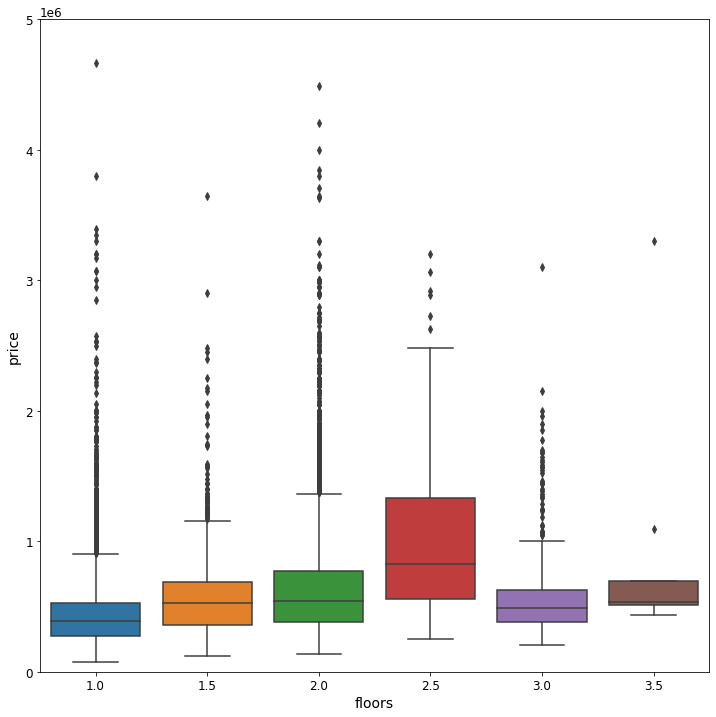

In [91]:
## Try your function to plot 'floors' vs 'price'.
## If you have implemented it correctly it will plot out the boxplots
print_boxplot('floors', figsize=(12, 12))

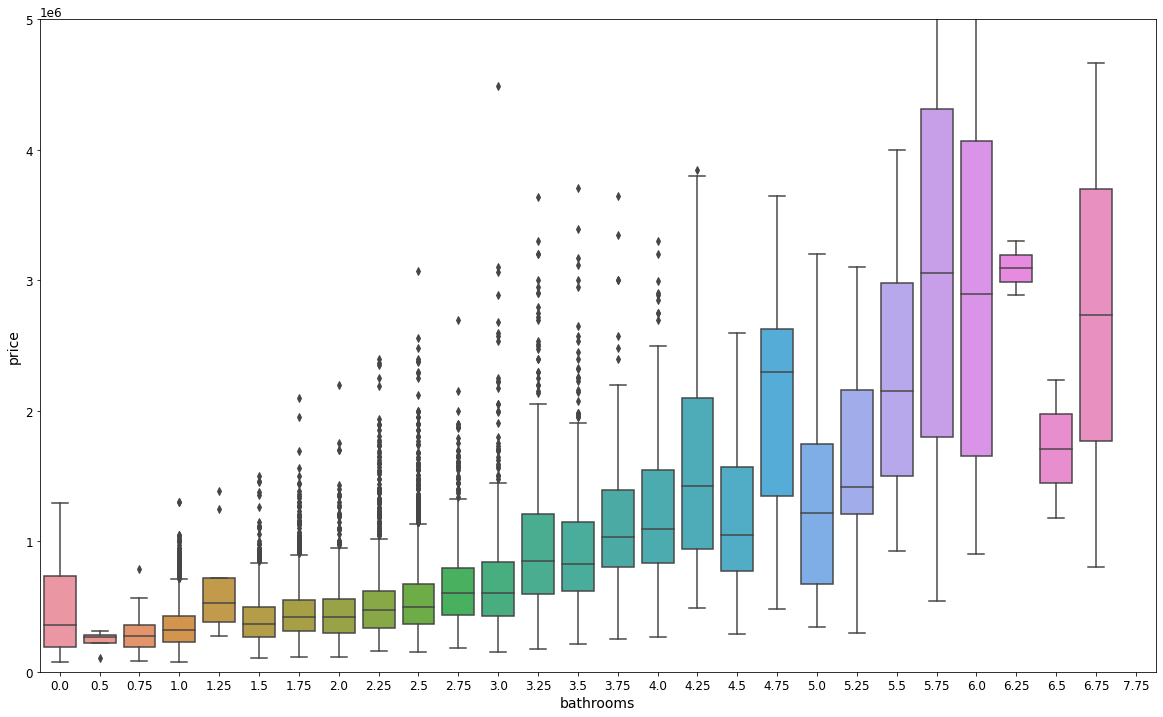

In [92]:
## Try your function to plot 'bathrooms' vs 'price'.
## If you have implemented it correctly it will plot out the boxplots
print_boxplot('bathrooms', figsize=(20, 12))

## Week 3: Data Pre-processing and Regression Algorithms

## 4. Preparing the Data for Machine Learning Algorithms

### 4.1 Data Cleaning

In [93]:
strat_train_set

id             date       price  bedrooms  bathrooms  \
20474   993000315  20141002T000000  379000.000         3      3.250   
3840    522059013  20140612T000000  173000.000         2      1.000   
7426   2524000050  20141212T000000 1393000.000         3      3.500   
4038   3277801450  20150415T000000  390000.000         4      1.000   
11420  7202290320  20141024T000000  440500.000         3      2.500   
...           ...              ...         ...       ...        ...   
14469  1254200835  20140813T000000  595000.000         4      1.750   
8505   1237500540  20141021T000000  225000.000         3      1.750   
549    5000500055  20140528T000000  215000.000         2      1.000   
4482   2919701944  20141010T000000  474000.000         3      1.000   
1941   2600010070  20150414T000000  998000.000         3      2.250   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
20474         1380      1234   3.000           0     0  ...      8   
3840           820     10450   1.000           0     0  ...      7   
7426          4240     21578   2.000           0     0  ...     10   
4038          1140      6250   1.500           0     0  ...      6   
11420         1600      3172   2.000           0     0  ...      7   
...            ...       ...     ...         ...   ...  ...    ...   
14469         2000      5100   1.000           0     0  ...      7   
8505          1370     10866   1.000           0     0  ...      6   
549           1320      8865   1.000           0     0  ...      6   
4482          1140      4560   1.000           0     0  ...      6   
1941          3370     11757   2.000           0     2  ...      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode     lat  \
20474        1380              0      2006             0    98103 208.050   
3840          820              0      1965             0    98055 127.830   
7426         3500            740      1994             0    98040 168.420   
4038         1140              0      1958             0    98126 162.990   
11420        1600              0      2002             0    98053 206.040   
...           ...            ...       ...           ...      ...     ...   
14469        1130            870      1949             0    98117 203.940   
8505         1370              0      1945             0    98052 203.220   
549          1320              0      1943             0    98168 148.470   
4482          770            370      1944             0    98117 206.670   
1941         3370              0      1980             0    98006 167.190   

            long  sqft_living15  sqft_lot15  
20474 -73402.600           1370        1282  
3840  -73359.700           1240       11200  
7426  -73364.500           3120       16440  
4038  -73412.500           1140        1370  
11420 -73312.600           1690        3698  
...          ...            ...         ...  
14469 -73417.300           1540        5100  
8505  -73349.200           1580       14250  
549   -73390.000           1190        6490  
4482  -73408.600           1340        3980  
1941  -73348.000           2690       10500  

[17290 rows x 21 columns]

# Start by separating the price label into a separate list

In [94]:
housing = strat_train_set.drop("price", axis=1) # drop labels for training set
housing_labels = strat_train_set["price"].copy()

In [95]:
housing.head()

id             date  bedrooms  bathrooms  sqft_living  \
20474   993000315  20141002T000000         3      3.250         1380   
3840    522059013  20140612T000000         2      1.000          820   
7426   2524000050  20141212T000000         3      3.500         4240   
4038   3277801450  20150415T000000         4      1.000         1140   
11420  7202290320  20141024T000000         3      2.500         1600   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
20474      1234   3.000           0     0          3      8        1380   
3840      10450   1.000           0     0          4      7         820   
7426      21578   2.000           0     0          3     10        3500   
4038       6250   1.500           0     0          3      6        1140   
11420      3172   2.000           0     0          3      7        1600   

       sqft_basement  yr_built  yr_renovated zipcode     lat       long  \
20474              0      2006             0   98103 208.050 -73402.600   
3840               0      1965             0   98055 127.830 -73359.700   
7426             740      1994             0   98040 168.420 -73364.500   
4038               0      1958             0   98126 162.990 -73412.500   
11420              0      2002             0   98053 206.040 -73312.600   

       sqft_living15  sqft_lot15  
20474           1370        1282  
3840            1240       11200  
7426            3120       16440  
4038            1140        1370  
11420           1690        3698

In [177]:
housing_labels.head()

20474    379000.000
3840     173000.000
7426    1393000.000
4038     390000.000
11420    440500.000
Name: price, dtype: float64

##### 4.1.1 Missing values and imputation

We can use `pd.DataFrame.isna()` or `pd.DataFrame.isnull()` to look for null or missing values in any of our variables/features.

NOTE: axis=1 performs the operation along the columns

In [97]:
## Look for rows with incomplete values
incomplete_rows = housing[housing.isna().any(axis=1)]
incomplete_rows

Empty DataFrame
Columns: [id, date, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In statistics, imputation is the process of replacing missing data with substituted values.
In scikit-learn we can use the `SimpleImputer` calss to perform imputation on missing  values. Generally we wil want to replace missing numeric (quantitative) values with the median value of that feature. For categorical features we may want to either use a "missing"/"unknown" category, use the mode, or drop the samples with missing values.

As there is no missing values in our dataset we would not really need to do this.

In [98]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
imputer.statistics_


array([ 3.90e+09,  3.00e+00,  2.25e+00,  1.91e+03,  7.61e+03,  1.50e+00,
        0.00e+00,  0.00e+00,  3.00e+00,  7.00e+00,  1.56e+03,  0.00e+00,
        1.98e+03,  0.00e+00,  1.71e+02, -7.34e+04,  1.84e+03,  7.62e+03])

In [99]:
df = pd.DataFrame(imputer.statistics_)
df

0
0  3904990345.000
1           3.000
2           2.250
3        1910.000
4        7610.000
5           1.500
6           0.000
7           0.000
8           3.000
9           7.000
10       1560.000
11          0.000
12       1975.000
13          0.000
14        171.435
15     -73369.300
16       1840.000
17       7620.000

In [100]:
housing_num.median().values

array([ 3.90e+09,  3.00e+00,  2.25e+00,  1.91e+03,  7.61e+03,  1.50e+00,
        0.00e+00,  0.00e+00,  3.00e+00,  7.00e+00,  1.56e+03,  0.00e+00,
        1.98e+03,  0.00e+00,  1.71e+02, -7.34e+04,  1.84e+03,  7.62e+03])

In [101]:
df = pd.DataFrame(housing_num.median().values)
df

0
0  3904990345.000
1           3.000
2           2.250
3        1910.000
4        7610.000
5           1.500
6           0.000
7           0.000
8           3.000
9           7.000
10       1560.000
11          0.000
12       1975.000
13          0.000
14        171.435
15     -73369.300
16       1840.000
17       7620.000

In [102]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr.sort_values(by='bathrooms', ascending=True)

id  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
14423 9543000205.000     0.000      0.000      844.000   4269.000   1.000   
1149  3421079032.000     1.000      0.000      670.000  43377.000   1.000   
6994  2954400190.000     0.000      0.000     4810.000  28008.000   2.000   
9854  7849202190.000     0.000      0.000     1470.000   4800.000   2.000   
3119  3918400017.000     0.000      0.000     1470.000    979.000   3.000   
...              ...       ...        ...          ...        ...     ...   
20578  424069279.000     6.000      6.500     6260.000  10955.000   2.000   
21506 2524069097.000     5.000      6.500     7270.000 130017.000   2.000   
4024  9175600025.000     7.000      6.750     7480.000  41664.000   2.000   
8092  1924059029.000     5.000      6.750     9640.000  13068.000   1.000   
9254  9208900037.000     6.000      7.750     9890.000  31374.000   2.000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
14423       0.000 0.000      4.000  7.000     844.000          0.000   
1149        0.000 0.000      3.000  3.000     670.000          0.000   
6994        0.000 0.000      3.000 12.000    4810.000          0.000   
9854        0.000 0.000      3.000  7.000    1470.000          0.000   
3119        0.000 2.000      3.000  8.000    1470.000          0.000   
...           ...   ...        ...    ...         ...            ...   
20578       0.000 0.000      3.000 11.000    4840.000       1420.000   
21506       0.000 0.000      3.000 12.000    6420.000        850.000   
4024        0.000 2.000      3.000 11.000    5080.000       2400.000   
8092        1.000 4.000      3.000 12.000    4820.000       4820.000   
9254        0.000 4.000      3.000 13.000    8860.000       1030.000   

       yr_built  yr_renovated     lat       long  sqft_living15  sqft_lot15  
14423  1913.000         0.000  83.430 -73375.000       1380.000    9600.000  
1149   1966.000         0.000  79.140 -73271.800       1160.000   42882.000  
6994   1990.000         0.000 199.260 -73320.700       4740.000   35061.000  
9854   1996.000         0.000 157.950 -73248.400       1060.000    7200.000  
3119   2006.000         0.000 214.350 -73406.800       1470.000    1399.000  
...         ...           ...     ...        ...            ...         ...  
20578  2007.000         0.000 178.410 -73311.700       2710.000   12550.000  
21506  2010.000         0.000 161.130 -73294.600       1800.000   44890.000  
4024   1953.000         0.000 139.290 -73410.400       2810.000   33190.000  
8092   1983.000      2009.000 167.100 -73363.000       3270.000   10454.000  
9254   2001.000         0.000 189.150 -73372.000       4540.000   42730.000  

[17290 rows x 18 columns]

In [103]:
housing_tr.loc[[14423, 1149, 6994]]

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
14423 9543000205.000     0.000      0.000      844.000  4269.000   1.000   
1149  3421079032.000     1.000      0.000      670.000 43377.000   1.000   
6994  2954400190.000     0.000      0.000     4810.000 28008.000   2.000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
14423       0.000 0.000      4.000  7.000     844.000          0.000   
1149        0.000 0.000      3.000  3.000     670.000          0.000   
6994        0.000 0.000      3.000 12.000    4810.000          0.000   

       yr_built  yr_renovated     lat       long  sqft_living15  sqft_lot15  
14423  1913.000         0.000  83.430 -73375.000       1380.000    9600.000  
1149   1966.000         0.000  79.140 -73271.800       1160.000   42882.000  
6994   1990.000         0.000 199.260 -73320.700       4740.000   35061.000

We might want to look for weird values as well...as it can be seen from the boxplotof bathrooms vs price some houses seem to have no bathroom. This is most likely an error and we may wont to replace those values with the median values for for bathrooms as well.

In [181]:
housing_tr.loc[housing['bathrooms'] == 0, 'bathrooms'] = np.nan
housing_tr.bathrooms.isna().value_counts()

False    17283
True         7
Name: bathrooms, dtype: int64

In [182]:
## Look for rows with incomplete values
incomplete_rows = housing_tr[housing_tr.isna().any(axis=1)]
incomplete_rows

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
6994          0        NaN         4810     28008   2.000           0     0   
1149          1        NaN          670     43377   1.000           0     0   
9854          0        NaN         1470      4800   2.000           0     0   
9773          0        NaN         2460      8049   2.000           0     0   
14423         0        NaN          844      4269   1.000           0     0   
3119          0        NaN         1470       979   3.000           0     2   
875           0        NaN         3064      4764   3.500           0     2   

       condition  grade  sqft_above  sqft_basement zipcode     lat       long  \
6994           3     12        4810              0   98053 199.260 -73320.700   
1149           3      3         670              0   98022  79.140 -73271.800   
9854           3      7        1470              0   98065 157.950 -73248.400   
9773           3      8        2460              0   98031 122.850 -73350.400   
14423          4      7         844              0   98001  83.430 -73375.000   
3119           3      8        1470              0   98133 214.350 -73406.800   
875            3      7        3064              0   98102 190.860 -73396.600   

       sqft_living15  sqft_lot15  age  renovated_flag  
6994            4740       35061   24               0  
1149            1160       42882   49               0  
9854            1060        7200   18               0  
9773            2520        8050   25               0  
14423           1380        9600  102               0  
3119            1470        1399    9               0  
875             2360        4000   24               0

In [105]:
housing_tr.bathrooms.fillna(housing_tr.bathrooms.median(), inplace=True)

In [106]:
housing_tr.loc[[14423, 1149, 6994]]

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
14423 9543000205.000     0.000      2.250      844.000  4269.000   1.000   
1149  3421079032.000     1.000      2.250      670.000 43377.000   1.000   
6994  2954400190.000     0.000      2.250     4810.000 28008.000   2.000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
14423       0.000 0.000      4.000  7.000     844.000          0.000   
1149        0.000 0.000      3.000  3.000     670.000          0.000   
6994        0.000 0.000      3.000 12.000    4810.000          0.000   

       yr_built  yr_renovated     lat       long  sqft_living15  sqft_lot15  
14423  1913.000         0.000  83.430 -73375.000       1380.000    9600.000  
1149   1966.000         0.000  79.140 -73271.800       1160.000   42882.000  
6994   1990.000         0.000 199.260 -73320.700       4740.000   35061.000

### 4.2 Transform Rows

It is always a good practice to write functions (or classes) to perform data transformations, so that these operations can later be performed in a reliable and reproducible way.

Below, we have a method that replaces zeroes with the median values for bathrooms, and splits the date the house was sold into `month_bought` and `yr_bought`, then computes the `age` (in years) of teh house when it was sold and introduces a boolean flag (`renovated_flag`) that states whether the house was renovated or not before being sold. It then removes features deemed not relevant (such as `id`, `date`, `yr_built`, `yr_bought`, `month_bought`, `yr_renovated`).

In [107]:
housing['date']

20474    20141002T000000
3840     20140612T000000
7426     20141212T000000
4038     20150415T000000
11420    20141024T000000
              ...       
14469    20140813T000000
8505     20141021T000000
549      20140528T000000
4482     20141010T000000
1941     20150414T000000
Name: date, Length: 17290, dtype: object

In [184]:
def transform_housing_rows(housing_df):
    """
    cleans up the data 
    """
    res = housing_df.copy()
    # houses with 0 bathrooms are a mistake, set them as null values
    res.loc[housing_df['bathrooms'] == 0, 'bathrooms'] = np.nan
    # use median imputing for missing values in bathrooms
    res.bathrooms.fillna(res.bathrooms.median(), inplace=True)
    # split the acquisition date in year and month and compute the age of the house when bought
    if 'date' in res.columns.values:
        res['yr_bought'] = res['date'].apply(lambda d: int(d[:4]))
        res['month_bought'] = res['date'].apply(lambda d: int(d[4:6]))
        res['age'] = res['yr_bought'] - housing_df['yr_built']
    # create a boolean flag to see whether the house was renovated or not
    res['renovated_flag'] = res['yr_renovated'].apply(lambda el: 0 if el == 0.0  else 1)
    # drop not relevant columns
    return housing_df.drop(
        columns=['id', 'date', 'yr_built', 'yr_bought', 'month_bought', 'yr_renovated'],
        errors='ignore'
    )
    
housing_proc = transform_housing_rows(housing)
housing_proc.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
20474         3      3.250         1380      1234   3.000           0     0   
3840          2      1.000          820     10450   1.000           0     0   
7426          3      3.500         4240     21578   2.000           0     0   
4038          4      1.000         1140      6250   1.500           0     0   
11420         3      2.500         1600      3172   2.000           0     0   

       condition  grade  sqft_above  sqft_basement zipcode     lat       long  \
20474          3      8        1380              0   98103 208.050 -73402.600   
3840           4      7         820              0   98055 127.830 -73359.700   
7426           3     10        3500            740   98040 168.420 -73364.500   
4038           3      6        1140              0   98126 162.990 -73412.500   
11420          3      7        1600              0   98053 206.040 -73312.600   

       sqft_living15  sqft_lot15  
20474           1370        1282  
3840            1240       11200  
7426            3120       16440  
4038            1140        1370  
11420           1690        3698

### 4.2 Handling Text and Categorical Attributes

In general we can consider three types of text features: categorical, ordinal, and unstructured.
Unstructured text is more the subject of Natural Language Processing, hence we will not consider its processing/encoding at this stage (and we have no unstructured data). Ordinal data are text categories that imply and intrinsic order such as the set ("BAD", "AVERAGE", "GOOD", "VERY GOOD", "EXCELLENT"). These are generally encodes as integers ("BAD" => 0, "AVERAGE" => 1, "GOOD" => 2, "VERY GOOD" => 3, "EXCELLENT" => 4). These transformations can be handed with custom functions as above.

To handle Categorical Attributes that are not ordinal, a common solution is to create one binary attribute per category. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called *dummy attributes*. Scikit-Learn provides a `sklearn.preprocessing.OneHotEncoder` class to convert categorical values into one-hot vectors.

In our case we have the "zipcode" attribute that can be considered as categorical. Each "zipcode" category should become a mutually exclusive dummy attribute

<b>Exercise 4:</b> Use the `OneHotEncoder` class to encode each ZIP code as a separate category. Check the documentation for appropriate use of the `OneHotEncoder` transformer. What kind of output do you get? 

In [109]:
## Write your solution here
from sklearn.preprocessing import OneHotEncoder

'''
Inspired by the example at: 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
'''
housing['zipcode'].sample(20)

# fit_transform(X[, y])
# transform(X) 


7117     98042
2246     98028
14830    98136
4535     98052
14088    98024
12000    98065
4284     98030
992      98125
6765     98056
20418    98065
7712     98038
4294     98033
11698    98118
3904     98006
16667    98003
13491    98112
14132    98102
7577     98042
12703    98117
18810    98029
Name: zipcode, dtype: object

In [110]:
enc = OneHotEncoder(categories= 'auto')

zipcode = housing[['zipcode']]
zip_1hot = enc.fit_transform(zipcode)

zip_1hot

<17290x70 sparse matrix of type '<class 'numpy.float64'>'
	with 17290 stored elements in Compressed Sparse Row format>

## 70 individual postcode categories
So each of the 17290 records have an extra 70 columns for is_zip1? is_zip2? .... is_zip68? is_zip69? 

In [111]:
zip_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
zip_1hot[15262,65]

0.0

In [113]:
df = pd.DataFrame(zip_1hot)
df

0
0        (0, 42)\t1.0
1        (0, 30)\t1.0
2        (0, 25)\t1.0
3        (0, 56)\t1.0
4        (0, 29)\t1.0
...               ...
17285    (0, 51)\t1.0
17286    (0, 28)\t1.0
17287    (0, 64)\t1.0
17288    (0, 51)\t1.0
17289     (0, 5)\t1.0

[17290 rows x 1 columns]

## The 70 unique categories (values) for zipcode

In [114]:
enc.categories_

[array(['98001', '98002', '98003', '98004', '98005', '98006', '98007',
        '98008', '98010', '98011', '98014', '98019', '98022', '98023',
        '98024', '98027', '98028', '98029', '98030', '98031', '98032',
        '98033', '98034', '98038', '98039', '98040', '98042', '98045',
        '98052', '98053', '98055', '98056', '98058', '98059', '98065',
        '98070', '98072', '98074', '98075', '98077', '98092', '98102',
        '98103', '98105', '98106', '98107', '98108', '98109', '98112',
        '98115', '98116', '98117', '98118', '98119', '98122', '98125',
        '98126', '98133', '98136', '98144', '98146', '98148', '98155',
        '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
       dtype=object)]

# Alternative method - pandas' get_dummies

In [115]:
one_hot_encoded_data = pd.get_dummies(housing_proc, columns = ['zipcode'])
one_hot_encoded_data

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
20474         3      3.250         1380      1234   3.000           0     0   
3840          2      1.000          820     10450   1.000           0     0   
7426          3      3.500         4240     21578   2.000           0     0   
4038          4      1.000         1140      6250   1.500           0     0   
11420         3      2.500         1600      3172   2.000           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
14469         4      1.750         2000      5100   1.000           0     0   
8505          3      1.750         1370     10866   1.000           0     0   
549           2      1.000         1320      8865   1.000           0     0   
4482          3      1.000         1140      4560   1.000           0     0   
1941          3      2.250         3370     11757   2.000           0     2   

       condition  grade  sqft_above  ...  zipcode_98146  zipcode_98148  \
20474          3      8        1380  ...              0              0   
3840           4      7         820  ...              0              0   
7426           3     10        3500  ...              0              0   
4038           3      6        1140  ...              0              0   
11420          3      7        1600  ...              0              0   
...          ...    ...         ...  ...            ...            ...   
14469          4      7        1130  ...              0              0   
8505           4      6        1370  ...              0              0   
549            4      6        1320  ...              0              0   
4482           4      6         770  ...              0              0   
1941           4      9        3370  ...              0              0   

       zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
20474              0              0              0              0   
3840               0              0              0              0   
7426               0              0              0              0   
4038               0              0              0              0   
11420              0              0              0              0   
...              ...            ...            ...            ...   
14469              0              0              0              0   
8505               0              0              0              0   
549                0              0              1              0   
4482               0              0              0              0   
1941               0              0              0              0   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
20474              0              0              0              0  
3840               0              0              0              0  
7426               0              0              0              0  
4038               0              0              0              0  
11420              0              0              0              0  
...              ...            ...            ...            ...  
14469              0              0              0              0  
8505               0              0              0              0  
549                0              0              0              0  
4482               0              0              0              0  
1941               0              0              0              0  

[17290 rows x 85 columns]

### 4.3 Custom Transformers (see if we should do this one)

You can define you own transformers creating a class that inherits both from `BaseEstimator` (so that it inherits the `.fit()` method) and the mixin class `TransformerMixin` (so that it acquires the `.transform()` method)

Here below you can see a transformer that set two new features: `renovated_flag` and `age`.

Transformers can take DataFrames as inputs but always output NumPy arrays, so for some transformations where you find more convenient to work on DataFrame you might prefer just to write you own functions that return a modified DataFrame as we did with `transform_housing_rows()`

In [116]:
from sklearn.base import BaseEstimator, TransformerMixin

yr_built_ix = housing.columns.values.tolist().index('yr_built') 
yr_renovated_ix = housing.columns.values.tolist().index('yr_renovated')
print(yr_built_ix, yr_renovated_ix)

class ManipulatedAttributesAdder(BaseEstimator, TransformerMixin):
    
    CURRENT_YEAR = 2017
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X):
        age = self.CURRENT_YEAR - X[:, yr_built_ix]
        renovated_flag = np.apply_along_axis(lambda r: 0 if r[yr_renovated_ix] == 0 else 1, 1, X)
        return np.concatenate((X, age[:, np.newaxis], renovated_flag[:, np.newaxis]), axis=1)

attr_adder = ManipulatedAttributesAdder()
housing_extra_attribs = pd.DataFrame(
    attr_adder.transform(housing_num.values),
    columns=[*housing_num.columns.values.tolist(), 'age', 'is_renovated'],
    index=housing_num.index
)
housing_extra_attribs.head(10)

13 14


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
20474  993000315.000     3.000      3.250     1380.000  1234.000   3.000   
3840   522059013.000     2.000      1.000      820.000 10450.000   1.000   
7426  2524000050.000     3.000      3.500     4240.000 21578.000   2.000   
4038  3277801450.000     4.000      1.000     1140.000  6250.000   1.500   
11420 7202290320.000     3.000      2.500     1600.000  3172.000   2.000   
12116  520069032.000     3.000      1.750     1890.000 93218.000   1.000   
14161 7660100085.000     5.000      2.750     2860.000  6000.000   2.500   
21429 1139000062.000     3.000      2.500     1150.000   887.000   3.000   
17076 5351200280.000     4.000      2.500     2390.000  5071.000   2.000   
1345  9301300751.000     3.000      1.500     1200.000   890.000   2.000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
20474       0.000 0.000      3.000  8.000    1380.000          0.000   
3840        0.000 0.000      4.000  7.000     820.000          0.000   
7426        0.000 0.000      3.000 10.000    3500.000        740.000   
4038        0.000 0.000      3.000  6.000    1140.000          0.000   
11420       0.000 0.000      3.000  7.000    1600.000          0.000   
12116       0.000 0.000      4.000  7.000    1890.000          0.000   
14161       0.000 0.000      4.000  8.000    2380.000        480.000   
21429       0.000 0.000      3.000  7.000    1150.000          0.000   
17076       0.000 0.000      3.000  9.000    1760.000        630.000   
1345        0.000 0.000      3.000  8.000    1030.000        170.000   

       yr_built  yr_renovated     lat       long  sqft_living15  sqft_lot15  \
20474  2006.000         0.000 208.050 -73402.600       1370.000    1282.000   
3840   1965.000         0.000 127.830 -73359.700       1240.000   11200.000   
7426   1994.000         0.000 168.420 -73364.500       3120.000   16440.000   
4038   1958.000         0.000 162.990 -73412.500       1140.000    1370.000   
11420  2002.000         0.000 206.040 -73312.600       1690.000    3698.000   
12116  1964.000         0.000  77.040 -73321.000       1690.000  172062.000   
14161  1902.000         0.000 177.180 -73394.800       2240.000    6000.000   
21429  2007.000         0.000 212.160 -73406.800       1180.000     915.000   
17076  1988.000         0.000 184.320 -73384.900       1940.000    5071.000   
1345   2008.000         0.000 191.520 -73402.600       1230.000    2120.000   

           age  is_renovated  
20474 2017.000         1.000  
3840  2017.000         1.000  
7426  2017.000         1.000  
4038  2017.000         1.000  
11420 2017.000         1.000  
12116 2017.000         1.000  
14161 2017.000         1.000  
21429 2017.000         1.000  
17076 2017.000         1.000  
1345  2017.000         1.000

An alternative way to perform this transformation:

### 4.4 Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. In the great majority of case, Machine Learning algorithms will not perform well when the input numerical attributes have very different scales.

There are two common ways to get all attributes to have the same scale:
* min-max scaling:  rescaling the range of features to scale the range in [0, 1] or [−1, 1] (using scikit-learn `MinMaxScaler`)
* standardization: scales the data to have zero mean and variance = 1 (using scikit-learn `StandardScaler`).

### 4.5 Transformation Pipelines

We are goin to use a `StandardScaler` directly after our `ManipulatedAttributesAdder` class using a Tranformation Pipeline

In [117]:
housing_num.describe()

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      17290.000 17290.000  17290.000    17290.000   17290.000 17290.000   
mean  4592511252.589     3.373      2.115     2079.757   14960.547     1.493   
std   2878747193.514     0.937      0.768      912.844   41658.782     0.539   
min      1000102.000     0.000      0.000      370.000     520.000     1.000   
25%   2124054210.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904990345.000     3.000      2.250     1910.000    7610.000     1.500   
75%   7312400078.750     4.000      2.500     2550.000   10697.750     2.000   
max   9900000190.000    33.000      7.750     9890.000 1651359.000     3.500   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count   17290.000 17290.000  17290.000 17290.000   17290.000      17290.000   
mean        0.008     0.233      3.409     7.658    1787.130        292.627   
std         0.088     0.763      0.650     1.180     824.641        442.167   
min         0.000     0.000      1.000     3.000     370.000          0.000   
25%         0.000     0.000      3.000     7.000    1190.000          0.000   
50%         0.000     0.000      3.000     7.000    1560.000          0.000   
75%         0.000     0.000      4.000     8.000    2210.000        570.000   
max         1.000     4.000      5.000    13.000    8860.000       4820.000   

       yr_built  yr_renovated       lat       long  sqft_living15  sqft_lot15  
count 17290.000     17290.000 17290.000  17290.000      17290.000   17290.000  
mean   1971.044        85.507   168.060 -73364.264       1983.980   12647.374  
std      29.390       404.116    41.502     42.263        684.765   26603.536  
min    1900.000         0.000    46.770 -73455.700        399.000     651.000  
25%    1951.000         0.000   141.120 -73398.700       1480.000    5100.000  
50%    1975.000         0.000   171.435 -73369.300       1840.000    7620.000  
75%    1997.000         0.000   203.400 -73337.500       2360.000   10118.000  
max    2015.000      2015.000   233.280 -73094.500       6210.000  858132.000

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])


def transform_housing_rows(housing_df):
    """
    cleans up the data 
    """
    res = housing_df.copy()
    # houses with 0 bathrooms are a mistake, set them as null values
    res.loc[housing_df['bathrooms'] == 0, 'bathrooms'] = np.nan
    # use median imputing for missing values in bathrooms
    res.bathrooms.fillna(res.bathrooms.median(), inplace=True)
    # split the acquisition date in year and month and compute the age of the house when bought
    if 'date' in res.columns.values:
        res['yr_bought'] = res['date'].apply(lambda d: int(d[:4]))
        res['month_bought'] = res['date'].apply(lambda d: int(d[4:6]))
        res['age'] = res['yr_bought'] - housing_df['yr_built']
    # create a boolean flag to see whether the house was renovated or not
    res['renovated_flag'] = res['yr_renovated'].apply(lambda el: 0 if el == 0.0  else 1)
    # drop not relevant columns
    return res.drop(
        columns=['id', 'date', 'yr_built', 'yr_bought', 'month_bought', 'yr_renovated'],
        errors='ignore'
    )
    


housing_num_tr = transform_housing_rows(housing_num)
housing_num_prepared = num_pipeline.fit_transform(housing_num_tr)
housing_num_prepared.shape

(17290, 16)

In [119]:
housing_num_prepared.min(axis=1), housing_num_prepared.max(axis=1)

(array([-0.91, -1.47, -0.63, ..., -1.47, -1.46, -0.66]),
 array([2.79, 0.91, 2.37, ..., 0.91, 0.93, 2.32]))

Until now, we have handled the categorical columns and the numerical columns separately. It would be more convenient if we had just one transformer capable to handle all columns, applying the appropriate transformations to each column. Solution: we can use scikit-learn `ColumnTransformer`!

<b>Exercise 5:</b> Use the `sklearn.compose.ColumnTransformer` class to create a pipeline that processes separately the numeric/quantitative attributes (using the `num_pipeline` that we have defined above) and the Categorical Atrribute `zipcode` using a one-hot-encoding without scaling. The binary attributes should remain unmodified

Hint: check the `ColumnTransformer` API: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [120]:
## Write your solution here:

from sklearn.compose import ColumnTransformer

housing_tr = transform_housing_rows(housing)



cat_attribs = ["zipcode"]
binary_attributes = ["renovated_flag", "waterfront", "view"] 
num_attribs = [
    el for el in list(
        housing_tr.select_dtypes(include=[np.number])
    ) if el not in binary_attributes
]
print(num_attribs)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(categories='auto'), cat_attribs),
        # ("bin", None, binary_attributes)
], remainder='passthrough')


housing_prepared = full_pipeline.fit_transform(housing_tr)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']


`OneHotEncoder` returns a sparse matrix, while `num_pipeline` returns a dense matrix. `ColumnTransformer` estimates the density of the final matrix (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than a given threshold. In this example, it returns a sparse matrix. 

And now we are done! We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to each column.

In [121]:
housing_prepared

<17290x87 sparse matrix of type '<class 'numpy.float64'>'
	with 261922 stored elements in Compressed Sparse Row format>

In [122]:
type(housing_prepared)

scipy.sparse.csr.csr_matrix

## Save all the pre-processed data (if needed, skipped in the class demo)

We will use `scipy.sparse.save_npz()` to save the sparse matrix, `np.save()` to save the NumPy arrays as `.npy` binary files, and `pickle` from the Python standard library to save our `full_pipeline`

In [123]:
"""
import pickle
from scipy.sparse import save_npz

X_filepath = os.path.abspath(os.path.join('..', 'dumps', 'kc_house_data_prepared.npz'))
y_filepath = os.path.abspath(os.path.join('..', 'dumps', 'kc_housed_data_prediction.npy'))
train_set_filepath = os.path.abspath(os.path.join('..', 'dumps', 'kc_housed_data_train_set.csv'))
test_set_filepath = os.path.abspath(os.path.join('..', 'dumps', 'kc_housed_data_test_set.csv'))
pipeline_filepath = os.path.abspath(os.path.join('..', 'dumps', 'full_preprocessing_pipeline'))

# create the "dumps" directory if it does not exist
os.makedirs(os.path.abspath(os.path.join('..', 'dumps')), exist_ok=True)

with open(pipeline_filepath, 'wb') as file_handle:
    pickle.dump(full_pipeline, file_handle)
    
print(type(strat_train_set), type(strat_test_set))

save_npz(X_filepath, housing_prepared)
np.save(y_filepath, housing_labels)
strat_train_set.to_csv(train_set_filepath)
strat_test_set.to_csv(test_set_filepath)
# np.save(train_set_filepath, strat_train_set)
# np.save(test_set_filepath, strat_test_set)
"""

'\nimport pickle\nfrom scipy.sparse import save_npz\n\nX_filepath = os.path.abspath(os.path.join(\'..\', \'dumps\', \'kc_house_data_prepared.npz\'))\ny_filepath = os.path.abspath(os.path.join(\'..\', \'dumps\', \'kc_housed_data_prediction.npy\'))\ntrain_set_filepath = os.path.abspath(os.path.join(\'..\', \'dumps\', \'kc_housed_data_train_set.csv\'))\ntest_set_filepath = os.path.abspath(os.path.join(\'..\', \'dumps\', \'kc_housed_data_test_set.csv\'))\npipeline_filepath = os.path.abspath(os.path.join(\'..\', \'dumps\', \'full_preprocessing_pipeline\'))\n\n# create the "dumps" directory if it does not exist\nos.makedirs(os.path.abspath(os.path.join(\'..\', \'dumps\')), exist_ok=True)\n\nwith open(pipeline_filepath, \'wb\') as file_handle:\n    pickle.dump(full_pipeline, file_handle)\n    \nprint(type(strat_train_set), type(strat_test_set))\n\nsave_npz(X_filepath, housing_prepared)\nnp.save(y_filepath, housing_labels)\nstrat_train_set.to_csv(train_set_filepath)\nstrat_test_set.to_csv(test

In [124]:
"""
some_data = strat_train_set.iloc[:10]
some_labels = strat_test_set.iloc[:10]
preprocessed_some_data = full_pipeline.transform(some_data)
"""

'\nsome_data = strat_train_set.iloc[:10]\nsome_labels = strat_test_set.iloc[:10]\npreprocessed_some_data = full_pipeline.transform(some_data)\n'

## 5. Select and train a model - Regression


We will start by looking at the Linear Regression model, the simplest Regression model there is. There are two different ways to train it:

* Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).

* Using an iterative optimization approach called Gradient Descent (GD) that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. We will look at a few variants of Gradient Descent: Batch GD, Mini-batch GD, and Stochastic GD. This will be used again later on, when we will be seeing Neural Networks

In [125]:
# For now we will only use the numerical fields and discard the categorical field "zipcode"
housing_num

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
20474   993000315         3      3.250         1380      1234   3.000   
3840    522059013         2      1.000          820     10450   1.000   
7426   2524000050         3      3.500         4240     21578   2.000   
4038   3277801450         4      1.000         1140      6250   1.500   
11420  7202290320         3      2.500         1600      3172   2.000   
...           ...       ...        ...          ...       ...     ...   
14469  1254200835         4      1.750         2000      5100   1.000   
8505   1237500540         3      1.750         1370     10866   1.000   
549    5000500055         2      1.000         1320      8865   1.000   
4482   2919701944         3      1.000         1140      4560   1.000   
1941   2600010070         3      2.250         3370     11757   2.000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
20474           0     0          3      8        1380              0   
3840            0     0          4      7         820              0   
7426            0     0          3     10        3500            740   
4038            0     0          3      6        1140              0   
11420           0     0          3      7        1600              0   
...           ...   ...        ...    ...         ...            ...   
14469           0     0          4      7        1130            870   
8505            0     0          4      6        1370              0   
549             0     0          4      6        1320              0   
4482            0     0          4      6         770            370   
1941            0     2          4      9        3370              0   

       yr_built  yr_renovated     lat       long  sqft_living15  sqft_lot15  
20474      2006             0 208.050 -73402.600           1370        1282  
3840       1965             0 127.830 -73359.700           1240       11200  
7426       1994             0 168.420 -73364.500           3120       16440  
4038       1958             0 162.990 -73412.500           1140        1370  
11420      2002             0 206.040 -73312.600           1690        3698  
...         ...           ...     ...        ...            ...         ...  
14469      1949             0 203.940 -73417.300           1540        5100  
8505       1945             0 203.220 -73349.200           1580       14250  
549        1943             0 148.470 -73390.000           1190        6490  
4482       1944             0 206.670 -73408.600           1340        3980  
1941       1980             0 167.190 -73348.000           2690       10500  

[17290 rows x 18 columns]

In [126]:
housing_labels

20474    379000.000
3840     173000.000
7426    1393000.000
4038     390000.000
11420    440500.000
            ...    
14469    595000.000
8505     225000.000
549      215000.000
4482     474000.000
1941     998000.000
Name: price, Length: 17290, dtype: float64

In [127]:
# transform_housing_rows cleans-up and feature-engineers our dataset
housing_num_tr = transform_housing_rows(housing_num)

# num_pipeline does (1) imputing: replaces missing values with the median value for the feature
# and (2) standardizes features by removing the mean and scaling to unit variance.
housing_prepared = num_pipeline.fit_transform(housing_num_tr)
housing_prepared.shape

(17290, 16)

### 5.1 Linear Regression - Closed form solution: Normal Equation 

We will use the `LinearRegression` class from `scikit-learn`

In [128]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
lin_reg.intercept_, lin_reg.coef_

(539396.933198379,
 array([-25672.77,   4020.2 ,  85966.67,   8301.72, -13208.28,  47906.95,
         41615.36,  36142.25,  98997.58,  79999.14,  28277.94,  89348.06,
        -34963.97,  19514.55,  -9608.81,  21065.58]))

In [129]:
len(lin_reg.coef_)

16

Let’s try it out on a few instances from the training set:

In [130]:
some_data = housing_num.iloc[:10]
some_labels = housing_labels.iloc[:10]
preprocessed_some_data = num_pipeline.transform(
    transform_housing_rows(some_data)
)

In [131]:
print("Predictions:", lin_reg.predict(preprocessed_some_data))
print("Labels:", list(some_labels))

Predictions: [ 480821.61  196427.76 1128346.26  170287.53  389404.97  207376.84
  709458.15  356002.56  680037.83  416153.07]
Labels: [379000.0, 173000.0, 1393000.0, 390000.0, 440500.0, 267300.0, 750000.0, 288000.0, 845000.0, 464950.0]


It mostly works, although the predictions are not exactly accurate. Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s `mean_squared_error()` function and computing its square root:

In [132]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse

41720013876.52702

In [133]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

204254.77687566334

This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. As we saw in the previous chapter, the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model

### 5.2 Linear Regression -  Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The concept behind Gradient Descent is to modify parameters iteratively to minimize a cost function.

The MSE cost function for a Linear Regression model is a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.

#### 5.2.1 Batch Gradient Descent

No example on this.

#### 5.2.2 Stochastic Gradient Descent

To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the `SGDRegressor` class. It defaults to optimizing the squared error cost function. 

In [134]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(
    loss="squared_error", # default cost function (MSE)
    max_iter=1000,   # maximum number of passes over the training data (aka epochs)
    penalty=None, # no regularisation
    eta0=0.01,  # initial learning rate
    tol=1e-3,   # stopping criterion tolerance. stop searching for a minimum 
                # (or maximum) once some tolerance is achieved, i.e. 
                # once you're close enough.
)
sgd_reg.fit(housing_prepared, housing_labels)
print('SGD Regressor intercept: {}'.format(sgd_reg.intercept_))
print('SGD Regressor coefficient: {}'.format(sgd_reg.coef_))

SGD Regressor intercept: [539988.26]
SGD Regressor coefficient: [-16459.1    2269.03  85576.43   9241.37 -13363.53  43620.16  42726.24
  36988.5   98393.14  77611.59  31925.09  91901.35 -31927.51  22277.14
  -8781.87  22499.67]


In [135]:
housing_predictions = sgd_reg.predict(housing_prepared)
sgd_mse = mean_squared_error(housing_labels, housing_predictions)
sgd_rmse = np.sqrt(lin_mse)
sgd_rmse

204254.77687566334

### Learning curves

Learning curves are a way to check whether your algorithm is learning properly. They are plots of the model's performance on the train and validation set as a function of the number of training iterations (or the size of the training set).

In [136]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import seaborn as sns

@ignore_warnings(category=ConvergenceWarning)
def plot_learning_curves(model, X, y, max_training_samples=None):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2
    )
    train_errors, val_errors = [], []
    # for training set size from 1 to max_training_samples
    for m in range(1, min(len(X_train), max_training_samples)):
        # train a new model
        model.fit(X_train[:m], y_train[:m])
        # make predictions on the training and validation set
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # compute the MSE on the training and validation set
        train_errors.append(
            mean_squared_error(y_train[:m], y_train_predict)
        )
        val_errors.append(
            mean_squared_error(y_val, y_val_predict)
        )
    fig, ax = plt.subplots(figsize=(16,10))
    # plot our performance metric (i.e. the RMSE)
    sns.lineplot(data=np.sqrt(train_errors), linewidth=2, label="train", ax=ax)
    sns.lineplot(data=np.sqrt(val_errors), linewidth=2, label="val", ax=ax)

CPU times: user 50.3 s, sys: 16.2 s, total: 1min 6s
Wall time: 19.3 s


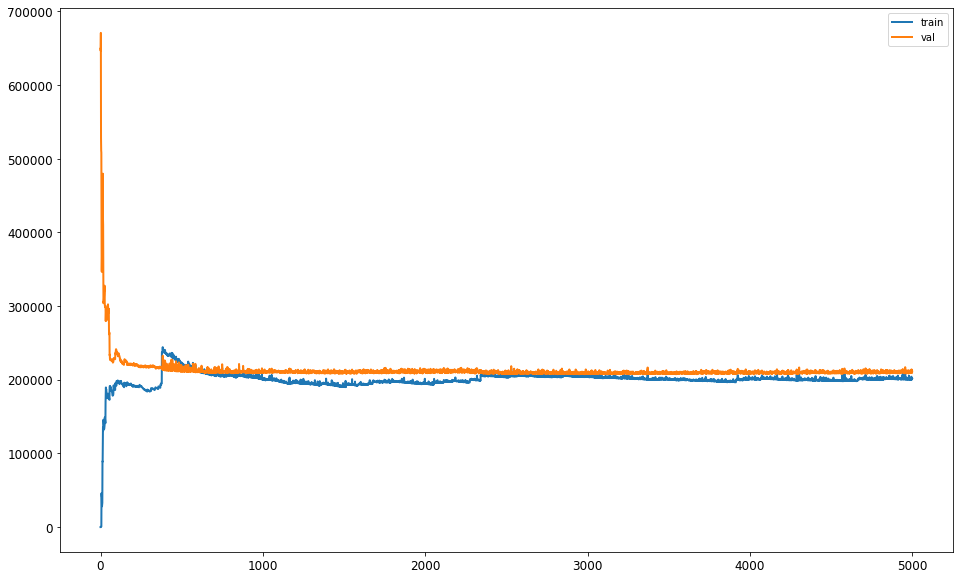

In [137]:
%%time
plot_learning_curves(
    sgd_reg, housing_prepared, housing_labels, max_training_samples=5000
)

Training and validation set actually have the same RMSE for $n_{samples} > 100$ but we can see that the RMSE flattens and does not keep decreasing. This means that the model is underfitting the training data.

If the model were overfitting the data you would notice a gap between the training and the validation curve (i.e. the validation error would be consistently greater than the training error)

<b>Exercise 6:</b> Initialize and train a `SGDRegressor` named `sgd_reg` with initial learning rate of $0.005$, `penalty` set to `None`, training for a maximum of 500 epochs over all the dataset. Then, pass the model and the input data and the output labels to the `plot_learning_curves()` function, setting its `max_training_samples` argument to $5000$. What is it plotting?

In [138]:
## Write your solution here:

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    loss="squared_error", # default cost function (MSE)
    max_iter=500,   # maximum number of passes over the training data (aka epochs)
    penalty=None, # no regularisation
    eta0=0.005,  # initial learning rate
    tol=1e-3,   # stopping criterion tolerance. stop searching for a minimum 
                # (or maximum) once some tolerance is achieved, i.e. 
                # once you're close enough.
)

sgd_reg.fit(housing_prepared, housing_labels)
print('SGD Regressor intercept: {}'.format(sgd_reg.intercept_))
print('SGD Regressor coefficient: {}'.format(sgd_reg.coef_))


SGD Regressor intercept: [536991.52]
SGD Regressor coefficient: [-29850.25    151.67  82032.64  10138.54 -13907.55  46697.76  38464.09
  36523.5   96786.82  77898.31  24074.28  87209.85 -34013.55  18165.7
  -8697.21  17655.74]


CPU times: user 55.8 s, sys: 18.8 s, total: 1min 14s
Wall time: 20.9 s


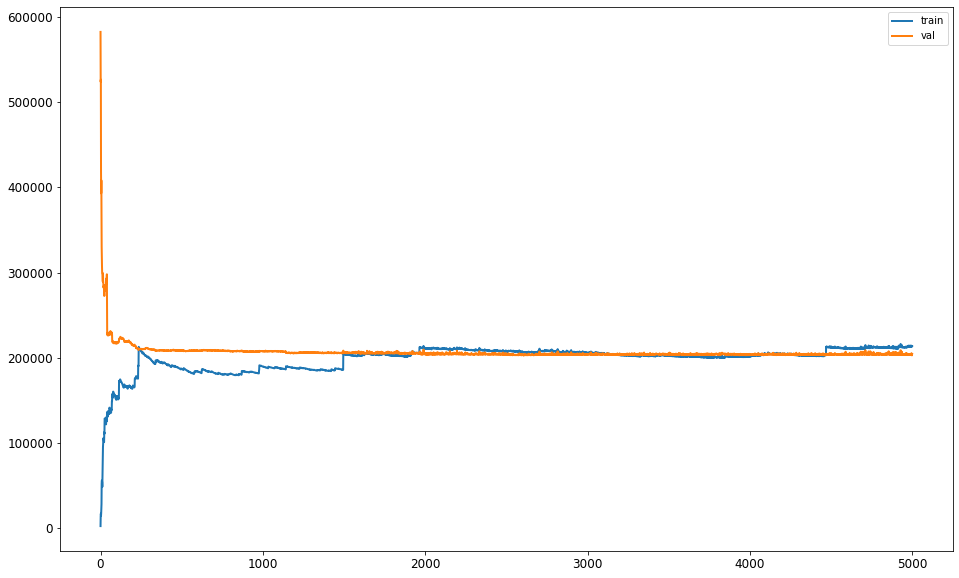

In [139]:
%%time
plot_learning_curves(
    sgd_reg, housing_prepared, housing_labels, max_training_samples=5000
)

### 5.3 Polynomial Regression

![poly_vs_linear](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*9x_5VZjJ1b5LhVvm5xRSRw.jpeg)

What if your data is more complex than a straight line (or an (N-1)-dimensional plane in an N-dimensional space)? Surprisingly, you can use a linear model to fit nonlinear data. This can be done with Polynomial Regression.

Polynomial regression relies on polynomial features, which can get features’ high-order and interaction terms. 

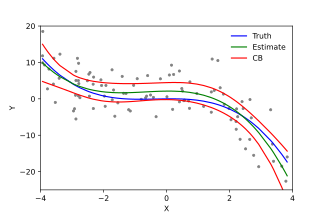

For instance if you have the features $X$ $Y$, polynomial features up to degree 2 will be $1$, $X$, $Y$, $X^2$, $XY$ $Y^2$.

Polynomial features up to degree 3 will be $1$, $X$, $Y$, $X^2$, $XY$ $Y^2$, $X^3$, $X^2Y$, $XY^2$, $Y^3$.



In [140]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
housing_poly = poly_features.fit_transform(housing_prepared)

In [141]:
housing_prepared[0].shape

(16,)

In [142]:
housing_poly.shape

(17290, 968)

In [143]:
230/20

11.5

In [144]:
lin_reg = LinearRegression()
lin_reg.fit(housing_poly, housing_labels)
lin_reg.intercept_, lin_reg.coef_

(459060328236.3004,
 array([-6.94e+10,  6.40e+11, -3.86e+12, -8.29e+10,  3.56e+11,  1.05e+13,
         2.43e+12,  2.18e+12,  4.59e+11,  3.47e+12,  1.51e+12,  8.56e+10,
         1.77e+10,  7.13e+10,  9.17e+10, -4.26e+12, -2.82e+03, -2.81e+03,
        -4.81e+12,  9.96e+03,  1.26e+04, -1.41e+12,  6.06e+03,  1.37e+03,
         3.64e+03,  4.35e+12,  2.33e+12, -1.35e+03, -3.55e+03,  3.74e+03,
         2.26e+03,  2.58e+11, -2.06e+03,  2.10e+12,  3.79e+04, -3.28e+03,
        -8.67e+11, -6.45e+02, -1.85e+03,  3.09e+03, -1.90e+12, -1.02e+12,
         1.59e+01,  7.70e+03, -1.27e+04, -1.01e+03,  3.24e+12,  3.68e+12,
         1.24e+11, -6.23e+12, -1.02e+12, -4.93e+12, -2.55e+12,  3.31e+11,
         1.73e+12,  3.55e+12,  3.02e+11,  2.80e+11, -8.77e+10,  1.56e+11,
        -4.58e+11, -2.95e+03,  6.65e+02, -2.29e+11, -4.00e+03,  1.61e+03,
         5.22e+01, -1.12e+11, -6.02e+10,  2.28e+04,  9.77e+03, -2.32e+04,
         1.13e+04, -2.82e+11, -1.01e+04,  6.76e+11,  9.19e+03,  9.21e+03,
         6.37e+02,

In [145]:
housing_predictions = lin_reg.predict(
    poly_features.transform(housing_prepared)
)
poly_mse = mean_squared_error(
    housing_labels, housing_predictions
)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

127252.91698494556

We could see how the RMSE is with respect to the min-max range of prices ("labels") in our dataset.

In [146]:
print('Lower housing price {}'.format(housing_labels.min()))
print('Higher housing price {}'.format(housing_labels.max()))
poly_rmse / (housing_labels.max() - housing_labels.min())

Lower housing price 75000.0
Higher housing price 6885000.0


0.01868618457928716

We could see how the RMSE is with respect to the min-max range of prices ("labels") in our dataset.

In [147]:
print('Q1 = {}'.format(housing_labels.quantile(0.25)))
print('Q3 = {}'.format(housing_labels.quantile(0.75)))
poly_rmse / (housing_labels.quantile(0.75) - housing_labels.quantile(0.25))

Q1 = 321500.0
Q3 = 643837.5


0.3947816092913346

In [148]:
some_data = housing_num.iloc[:10]
some_labels = housing_labels.iloc[:10]
preprocessed_some_data = num_pipeline.transform(
    transform_housing_rows(some_data)
)
print("Predictions:", lin_reg.predict(
    poly_features.transform(preprocessed_some_data)
))
print("Labels:", list(some_labels))

Predictions: [ 439219.13  194512.96 1331924.19  341349.56  423976.1   418390.28
  845675.47  311448.63  757054.19  477600.54]
Labels: [379000.0, 173000.0, 1393000.0, 390000.0, 440500.0, 267300.0, 750000.0, 288000.0, 845000.0, 464950.0]


Adding many polynomial features can increase the complexity of your model, which can cause overfitting.

To solve overfitting you will have to rely on regularization techniques, such as Ridge or Lasso Regularization (see below)

### 5.3.1 Using Cross Validation

Let's try and use the function `sklearn.model_selection.cross_val_score()` to evaluate our Polynomial Regression model on the training set using a 10-fold cross-validation with RMSE as a score. Print out the mean value and the standard deviation of the RMSE across the 10 validation iterations

In [149]:
import time
from sklearn.model_selection import cross_val_score
start = time.time()
scores = cross_val_score(
    lin_reg, # model we want to train
    housing_poly, # features
    housing_labels, # labels
    scoring='neg_mean_squared_error', # -MSE
    cv=10
)

In [150]:
scores

array([-3.01e+12, -5.62e+11, -2.52e+29, -2.27e+11, -1.91e+11, -5.69e+10,
       -3.06e+25, -5.13e+10, -5.97e+11, -8.88e+24])

In [151]:
poly_rmse_scores = np.sqrt(-scores)

In [152]:
poly_rmse_scores.mean()

51071820474587.016

In [153]:
poly_rmse_scores.std()

150388009531975.72

In [154]:
# You can also use this function to print out mean value and std of the scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", "{0:.2f}".format(scores.mean()))
    print("Standard deviation:", "{0:.2f}".format(scores.std()))

In [155]:
display_scores(poly_rmse_scores) 

Scores: [1.74e+06 7.50e+05 5.02e+14 4.77e+05 4.37e+05 2.38e+05 5.53e+12 2.26e+05
 7.73e+05 2.98e+12]
Mean: 51071820474587.02
Standard deviation: 150388009531975.72


If I want to try more scoring metrics at once while performing cross-validation, and I want to get more information than just the scores themselves I can use `sklearn.model_selection.cross_validate()`.

In [156]:
from sklearn.model_selection import cross_validate, KFold
start = time.time()
n_splits = 10
k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_res = cross_validate(
    lin_reg,
    housing_poly,
    housing_labels,
    scoring=['neg_mean_squared_error', 'r2'],
    cv=k_fold
)
end = time.time()
print("Duration: {} s".format(end - start))

Duration: 24.905211210250854 s


In [157]:
cv_res

{'fit_time': array([2.76, 2.73, 2.23, 2.15, 2.28, 2.75, 2.73, 2.31, 2.5 , 2.43]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_neg_mean_squared_error': array([-5.44e+14, -3.15e+10, -4.68e+10, -5.83e+10, -3.26e+11, -2.95e+11,
        -2.68e+27, -3.44e+10, -1.13e+26, -4.63e+10]),
 'test_r2': array([-4.48e+03,  7.94e-01,  6.34e-01,  4.93e-01, -1.49e+00, -1.28e+00,
        -1.71e+16,  7.61e-01, -9.57e+14,  5.76e-01])}

In [158]:
poly_rmse_scores = np.sqrt(-cv_res['test_neg_mean_squared_error'])
display_scores(poly_rmse_scores) 

Scores: [2.33e+07 1.77e+05 2.16e+05 2.41e+05 5.71e+05 5.43e+05 5.18e+13 1.86e+05
 1.06e+13 2.15e+05]
Mean: 6242769779886.72
Standard deviation: 15511714503040.83


<b>Exercise 7:</b> Use the function `sklearn.model_selection.cross_val_score()` to evaluate our Stochastic Gradient Regressor model on the training set using a 5-fold cross-validation using the mean absolute error (MAE) as a score. Print out the mean value and the standard deviation of the mean absolute error across the 5 validation iterations

In [159]:
# Write your solution here

import time
from sklearn.model_selection import cross_val_score
start = time.time()
scores = cross_val_score(
    lin_reg, # model we want to train
    housing_poly, # features
    housing_labels, # labels
    scoring='neg_mean_absolute_error', # -MAE
    cv=5
)


In [160]:
scores

array([-5.75e+12, -4.33e+11, -4.25e+11, -2.51e+12, -3.25e+12])

In [161]:
poly_rmse_scores = np.sqrt(-scores)
poly_rmse_scores.mean()

1419530.6803627773

In [162]:
poly_rmse_scores.std()

678737.8502449667

In [163]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", "{0:.2f}".format(scores.mean()))
    print("Standard deviation:", "{0:.2f}".format(scores.std()))
    
display_scores(poly_rmse_scores) 

Scores: [2398781.46  657770.23  651930.72 1585740.91 1803430.07]
Mean: 1419530.68
Standard deviation: 678737.85


### 5.5 Ridge Regression

Ridge Regression is a regularized version of the Linear Regression algorithm: we add to the cost function a regularization term. This term for Ridge is equal to $ \alpha \sum_{i=1}^{N}{\theta_i^2} $. This means that it forces the learning algorithm to fit not only the data but also keep the model weights as small as possible. An important thing to note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.

Ridge regression is a type of $\ell_2$ regularisation, because the regularisation term is equal to half the square of the $\ell_2$ norm of the weight vector.

In [164]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=100000, solver="cholesky")
cv_res = cross_validate(
    ridge_reg,
    housing_poly,
    housing_labels,
    scoring=['neg_mean_squared_error', 'r2'],
    cv=k_fold
)
cv_res

{'fit_time': array([0.22, 0.21, 0.21, 0.2 , 0.24, 0.22, 0.23, 0.24, 0.23, 0.21]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_neg_mean_squared_error': array([-3.90e+10, -4.50e+10, -4.01e+10, -3.82e+10, -4.08e+10, -4.13e+10,
        -8.11e+10, -4.21e+10, -3.86e+10, -3.59e+10]),
 'test_r2': array([0.68, 0.7 , 0.69, 0.67, 0.69, 0.68, 0.48, 0.71, 0.67, 0.67])}

In [165]:
ridge_rmse_scores = np.sqrt(-cv_res['test_neg_mean_squared_error'])
display_scores(ridge_rmse_scores) 

Scores: [197473.06 212123.49 200317.33 195543.99 201962.71 203344.47 284814.01
 205139.31 196426.11 189472.58]
Mean: 208661.71
Standard deviation: 26041.38


### 5.6  Lasso Regression [skip]

Lasso Regression is a regularized version of the Linear Regression algorithm: we add to the cost function a regularization term. This term for Lasso is equal to $ \alpha \sum_{i=1}^{N}{\mid \theta_i \mid} $.


Lasso regression is a type of $\ell_1$ regularisation, because the regularisation term is equal to the $\ell_1$ norm of the weight vector.

### 5.7 Elastic Net [skip]

ElasticNet combines $\ell_1$ and $\ell_2$ regularisation.

In [166]:
from sklearn.linear_model import ElasticNet
el_net = ElasticNet(alpha=100000, l1_ratio=0.01, max_iter=10000)
cv_res = cross_validate(
    el_net,
    housing_poly,
    housing_labels,
    scoring=['neg_mean_squared_error', 'r2'],
    cv=k_fold
)
cv_res

{'fit_time': array([1.9 , 1.95, 2.01, 2.07, 1.71, 1.01, 1.93, 2.09, 2.24, 1.82]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_neg_mean_squared_error': array([-1.18e+11, -1.44e+11, -1.24e+11, -1.11e+11, -1.26e+11, -1.24e+11,
        -1.50e+11, -1.39e+11, -1.12e+11, -1.06e+11]),
 'test_r2': array([0.02, 0.06, 0.03, 0.03, 0.04, 0.04, 0.05, 0.04, 0.05, 0.03])}

In [167]:
elnet_rmse_scores = np.sqrt(-cv_res['test_neg_mean_squared_error'])
display_scores(elnet_rmse_scores) 

Scores: [344160.02 378864.88 352359.94 333572.4  354575.46 352666.33 386913.24
 372532.76 334556.62 325398.08]
Mean: 353559.97
Standard deviation: 19385.81


### 5.8 Decision Trees 

In [168]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
cv_res = cross_validate(
    dtree,
    housing_num,
    housing_labels,
    scoring=['neg_mean_squared_error', 'r2'],
    cv=k_fold
)
cv_res

{'fit_time': array([0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_neg_mean_squared_error': array([-3.24e+10, -3.95e+10, -2.95e+10, -3.73e+10, -4.38e+10, -2.72e+10,
        -3.28e+10, -6.65e+10, -3.02e+10, -2.88e+10]),
 'test_r2': array([0.73, 0.74, 0.77, 0.68, 0.67, 0.79, 0.79, 0.54, 0.74, 0.74])}

In [169]:
dtree_rmse_scores = np.sqrt(-cv_res['test_neg_mean_squared_error'])
display_scores(dtree_rmse_scores) 

Scores: [179975.15 198716.4  171760.51 193038.14 209391.05 164965.77 181118.32
 257962.37 173796.77 169638.  ]
Mean: 190036.25
Standard deviation: 26260.27


In [170]:
dtree_5 = DecisionTreeRegressor(max_depth=2)
most_important_feats =['sqft_living', 'grade', 'sqft_living15']
dtree_5.fit(housing_num[most_important_feats], housing_labels)

DecisionTreeRegressor(max_depth=2)

In [171]:
from sklearn.tree import export_graphviz
os.makedirs(os.path.abspath(os.path.join("..", "output")), exist_ok=True)
export_graphviz(
    dtree_5,
    out_file=os.path.abspath(os.path.join("..", "output", "kc-dtree.dot")),
    feature_names=most_important_feats,
    # class_names=iris.target_names,
    rounded=True,
    filled=True
)

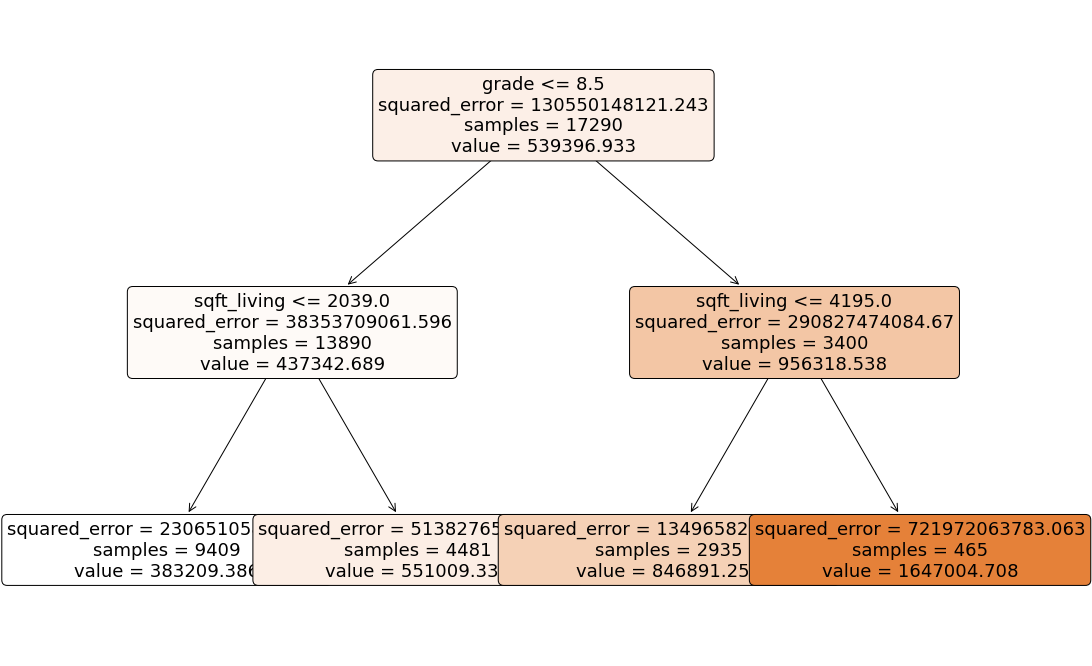

In [172]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18,12))
res = plot_tree(
    dtree_5, 
    feature_names=most_important_feats, 
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=18
)

### 5.8 Random Forests

In [173]:
from sklearn.ensemble import RandomForestRegressor
forest_regr = RandomForestRegressor(n_estimators=10) # new default numnber of estimators is 100 since 0.22
start = time.time()
cv_res = cross_validate(
    forest_regr,
    housing_num,
    housing_labels,
    scoring=['neg_mean_squared_error', 'r2'],
    cv=k_fold
)
end = time.time()
print("Duration: {} s".format(end - start))
cv_res

Duration: 10.043069839477539 s


{'fit_time': array([0.98, 0.97, 0.96, 0.97, 0.99, 1.  , 1.  , 1.05, 1.01, 1.04]),
 'score_time': array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]),
 'test_neg_mean_squared_error': array([-1.92e+10, -1.91e+10, -1.79e+10, -1.64e+10, -1.86e+10, -1.67e+10,
        -2.12e+10, -3.37e+10, -1.49e+10, -1.50e+10]),
 'test_r2': array([0.84, 0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.77, 0.87, 0.86])}

In [174]:
forest_rmse_scores = np.sqrt(-cv_res['test_neg_mean_squared_error'])
display_scores(forest_rmse_scores)

Scores: [138490.   138120.76 133916.22 127894.45 136244.64 129106.38 145648.51
 183650.79 122077.13 122569.9 ]
Mean: 137771.88
Standard deviation: 16836.96


## 6. Fine-tuning of your model

### 6.1 Grid Search 

In [185]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators': [3, 10, 30], 
        'max_features': [2, 4, 6, 8]
    },
    {
        'bootstrap': [False], 
        'n_estimators': [3, 10], 
        'max_features': [2, 3, 4]
    },
]

forest_regr = RandomForestRegressor()
grid_search = GridSearchCV(
    forest_regr, param_grid, cv=5,
    scoring='neg_mean_squared_error', return_train_score=True
)

In [186]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [187]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [188]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [189]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(
    cv_res['mean_test_score'], 
    cv_res['params']
):
    print(np.sqrt(-mean_score), params)

179758.68059196143 {'max_features': 2, 'n_estimators': 3}
154275.96520520156 {'max_features': 2, 'n_estimators': 10}
147825.6022610697 {'max_features': 2, 'n_estimators': 30}
168825.02295595536 {'max_features': 4, 'n_estimators': 3}
142971.12864095822 {'max_features': 4, 'n_estimators': 10}
136916.09709728588 {'max_features': 4, 'n_estimators': 30}
159445.5616843573 {'max_features': 6, 'n_estimators': 3}
137205.00396615962 {'max_features': 6, 'n_estimators': 10}
132015.74302755864 {'max_features': 6, 'n_estimators': 30}
151624.40448822893 {'max_features': 8, 'n_estimators': 3}
138142.79677246913 {'max_features': 8, 'n_estimators': 10}
130801.6473092069 {'max_features': 8, 'n_estimators': 30}
176631.16479592715 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
146220.9567353218 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
172610.11344608493 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
141958.0554083781 {'bootstrap': False, 'max_features': 3, 'n_esti

### 6.2 Randomized Search

From https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search

While using a grid of parameter settings is currently the most widely used method for parameter optimization, other search methods have more favourable properties. `RandomizedSearchCV` implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

* A budget can be chosen independent of the number of parameters and possible values.
* Adding parameters that do not influence the performance does not decrease efficiency.

Specifying how parameters should be sampled is done using a dictionary, very similar to specifying parameters for `GridSearchCV`.

### 6.3 Ensemble Methods

A possible way to fine tune your model is just to combine the models that perform best. You can get a good ensemble estimator out of a bunch of sloppy estimators. Random Forests are just an ensemble of Decision Trees trained on a random subset of the training set. Check the `sklearn.ensemble` module for more Ensemble Methods.

## 7. Evaluate Your System on the Test Set

After trying various your models and hyperparameter combinations you will eventually have an algorithm that performs sufficiently well. At this point the time comes to evaluate the final model on the test set. 

<b>Exercise 8:</b> Evaluate your best model on the test set we held out at the beginning of our analysis pipeline. What performance do you get? Is that what you expected?

In [ ]:
# 

## 8. Deploy, Monitor, and Maintain Your System

At this stage you could think of wrapping the chosen model within a dedicated web service that your web application can access through a Web API. But this is the subject for another course!!

### This is the end of the demo for Week 2/3!!
See you next week